In [5]:
%cd '/mnt/scratch-lustre/horlaville/clara_limlam/limCode2020-master_clara_2/'

/fs/lustre/scratch/horlaville/clara_limlam/limCode2020-master_clara_2


In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter
plt.rcParams["mathtext.fontset"] = "dejavuserif"

Signal:

In [7]:
binning = np.logspace(1, 5, 50)
center = (binning[:-1] + binning[1:]) / 2

In [8]:
lc_paths = '/home/dongwooc/scratchspace/pprun_hiz_npz/'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(lc_paths) if isfile(join(lc_paths, f))]
onlyfiles.remove('pksc2npz_5313591.out')
onlyfiles.remove('pksc2npz.sh')
for i in range(len(onlyfiles)):
    onlyfiles[i] = lc_paths+onlyfiles[i]

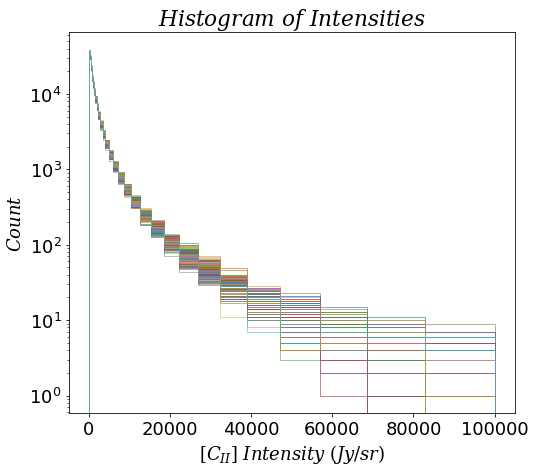

In [9]:
n_zdex04_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_nuObs270 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/sig/cii_sig'+str(i)+'.npy')
    n_zdex04_tot[i], _, _ = plt.hist(sig_nuObs270.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [10]:
avg_zdex04 = np.nanmean(n_zdex04_tot, axis = 0)

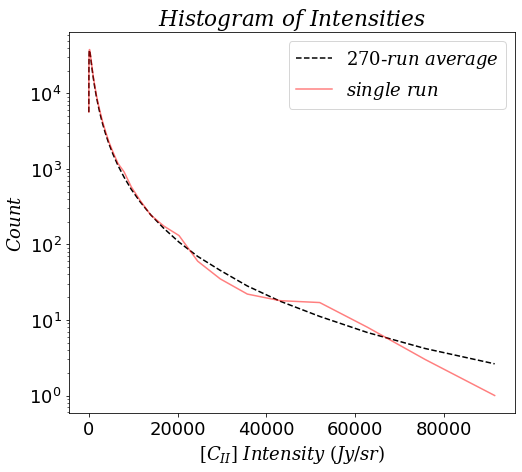

In [11]:
plt.plot(center, avg_zdex04, '--k', label = r'$270$-$run\ average$')
plt.plot(center, n_zdex04_tot[4], 'r', label = r'$single\ run$', alpha = 0.5)
plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.yscale('log')
plt.title(r'$Histogram\ of\ Intensities$')
plt.legend()

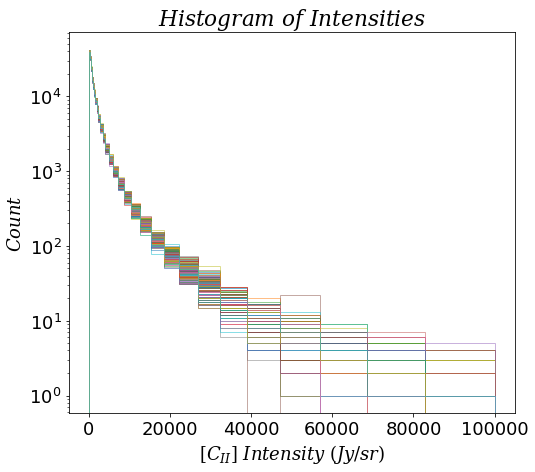

In [12]:
n_zdex03_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_zdex03 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex03/sig/cii_sig'+str(i)+'.npy')
    n_zdex03_tot[i], _, _ = plt.hist(sig_zdex03.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [13]:
avg_zdex03 = np.nanmean(n_zdex03_tot, axis = 0)

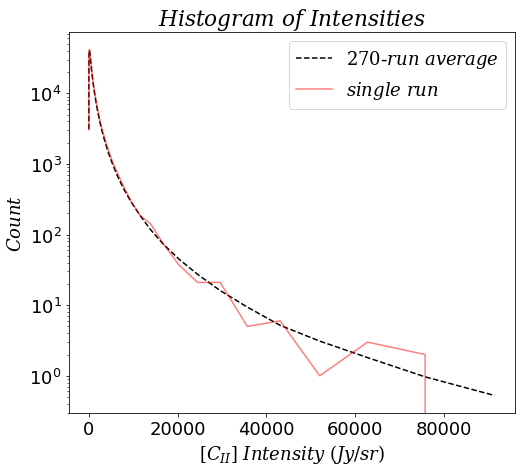

In [61]:
plt.plot(center, avg_zdex03, '--k', label = r'$270$-$run\ average$')
plt.plot(center, n_zdex03_tot[4], 'r', label = r'$single\ run$', alpha = 0.5)
plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.yscale('log')
plt.title(r'$Histogram\ of\ Intensities$')
plt.legend()

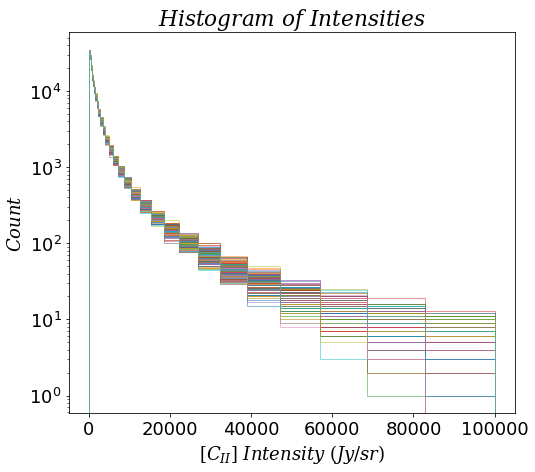

In [14]:
n_zdex05_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_zdex05 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex05/sig/cii_sig'+str(i)+'.npy')
    n_zdex05_tot[i], _, _ = plt.hist(sig_zdex05.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [15]:
avg_zdex05 = np.nanmean(n_zdex05_tot, axis = 0)

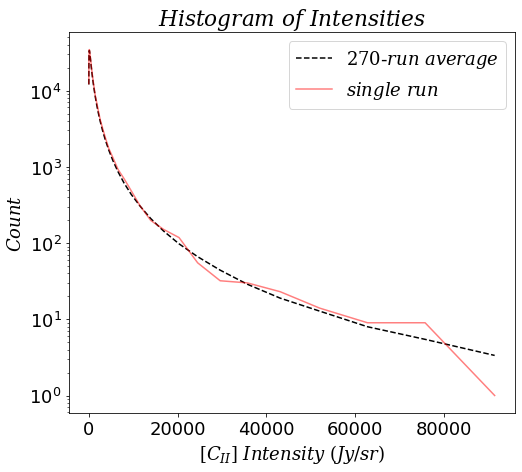

In [64]:
plt.plot(center, avg_zdex05, '--k', label = r'$270$-$run\ average$')
plt.plot(center, n_zdex05_tot[4], 'r', label = r'$single\ run$', alpha = 0.5)
plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.yscale('log')
plt.title(r'$Histogram\ of\ Intensities$')
plt.legend()

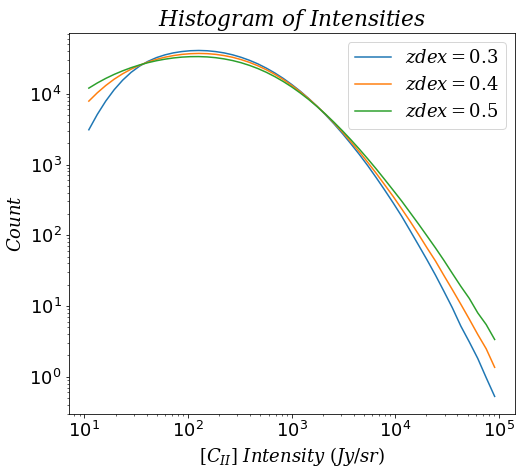

In [15]:
plt.plot(center, avg_zdex03, label = r'$zdex = 0.3$')
plt.plot(center, avg_zdex04, label = r'$zdex = 0.4$')
plt.plot(center, avg_zdex05, label = r'$zdex = 0.5$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()

#plt.savefig('paper_figs/dsrel/zdex_hist.png', bbox_inches = 'tight')

This makes a lot of sense: as zdex increases, there is more scatter in metallicity. As the scatter in metallicity increases, the scatter in $[C_{II}]$ intensities increases since $L_{[C_{II}]} \propto Z$. As the scatter in $L_{[C_{II}]}$ increases, the distribution of $[C_{II}]$ intensities are more scattered around its average: the intensities before the scattering are pushed up or down with a magnitude proportional to the magnitude of the scatter. As a result, more values are drawn towards the extremes. That means we should expect that as scatter increases,the distribution of intensities flattens towards the center and increases towards the edges, which is what we observe here.

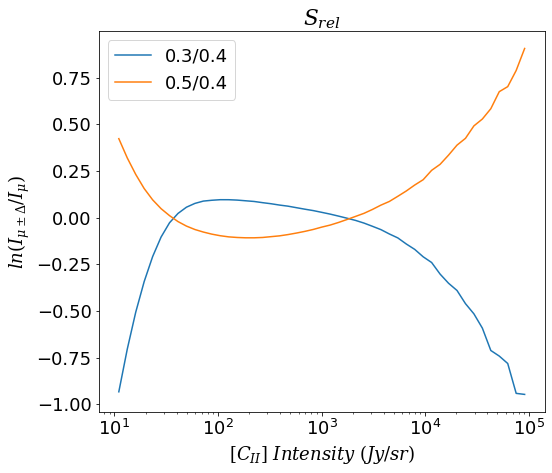

In [16]:
plt.plot(center, np.log(avg_zdex03/avg_zdex04), label = '0.3/0.4')
plt.plot(center, np.log(avg_zdex05/avg_zdex04), label = '0.5/0.4')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$ln(I_{\mu \pm \Delta}/I_{\mu})$')
plt.title(r'$S_{rel}$')
plt.xscale('log')
#plt.yscale('log')

plt.legend()

#plt.savefig('paper_figs/dsrel/zdex_srel.png', bbox_inches = 'tight')

$\alpha_{[C_{II}]}$:

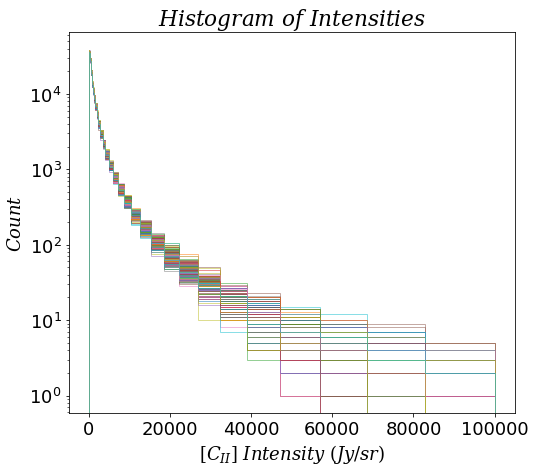

In [16]:
n_a20_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_a20 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-020/sig/cii_sig'+str(i)+'.npy')
    n_a20_tot[i], _, _ = plt.hist(sig_a20.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

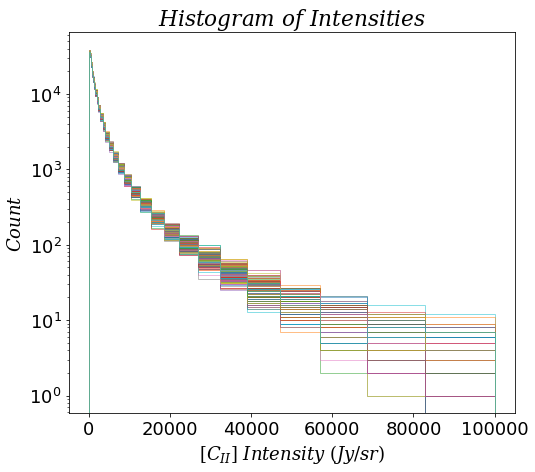

In [17]:
n_a28_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_a28 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-028/sig/cii_sig'+str(i)+'.npy')
    n_a28_tot[i], _, _ = plt.hist(sig_a28.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [18]:
avg_a20 = np.nanmean(n_a20_tot, axis = 0)
avg_a28 = np.nanmean(n_a28_tot, axis = 0)
avg_a24 = avg_zdex04

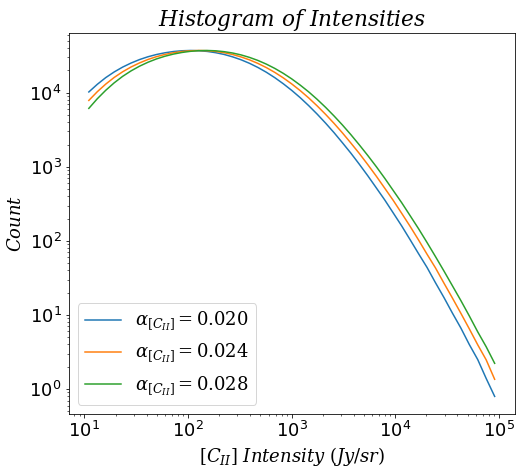

In [20]:
plt.plot(center, avg_a20, label = r'$\alpha_{[C_{II}]} = 0.020$')
plt.plot(center, avg_a24, label = r'$\alpha_{[C_{II}]} = 0.024$')
plt.plot(center, avg_a28, label = r'$\alpha_{[C_{II}]} = 0.028$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()

#plt.savefig('paper_figs/dsrel/alpha_cii_hist.png', bbox_inches = 'tight')

Again, the results here make a lot of sense: $\alpha_{[C_{II}]}$ is the scaling factor of $L_{[C_{II}]}$. If we increase it, we therefore expect the whole distribution of $[C_{II}]$ intensities to increase uniformly. And that is what we observe with the histograms: there are less halos with lower $[C_{II}]$ intensity and more halos with higher $[C_{II}]$ intensity as $\alpha_{[C_{II}]}$ increases.

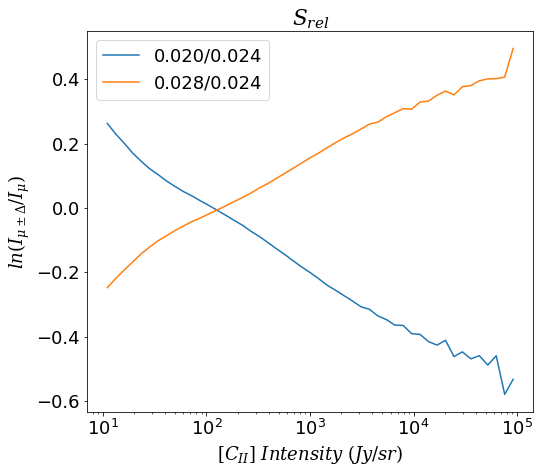

In [21]:
plt.plot(center, np.log(avg_a20/avg_a24), label = '0.020/0.024')
plt.plot(center, np.log(avg_a28/avg_a24), label = '0.028/0.024')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$ln(I_{\mu \pm \Delta}/I_{\mu})$')
plt.title(r'$S_{rel}$')
plt.xscale('log')


plt.legend()
#plt.savefig('paper_figs/dsrel/alpha_cii_srel.png', bbox_inches = 'tight')

$\alpha_{M_{HI}}$:

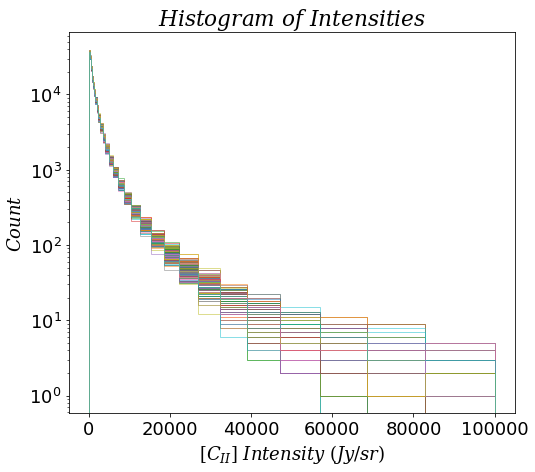

In [19]:
n_mhi68_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_mhi68 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-68/sig/cii_sig'+str(i)+'.npy')
    n_mhi68_tot[i], _, _ = plt.hist(sig_mhi68.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

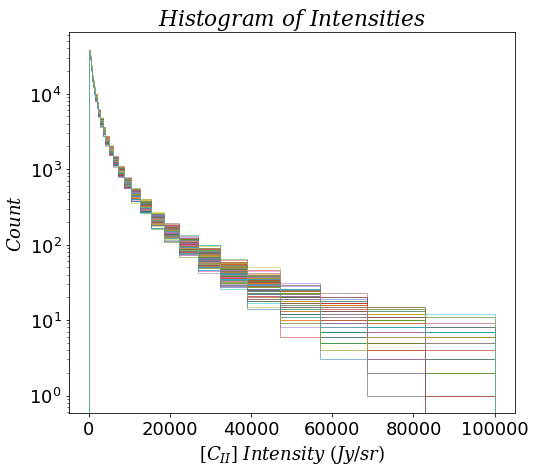

In [20]:
n_mhi80_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_mhi80 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-80/sig/cii_sig'+str(i)+'.npy')
    n_mhi80_tot[i], _, _ = plt.hist(sig_mhi80.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [21]:
avg_mhi68 = np.nanmean(n_mhi68_tot, axis = 0)
avg_mhi80 = np.nanmean(n_mhi80_tot, axis = 0)
avg_mhi74 = avg_zdex04

(7000, 10000)

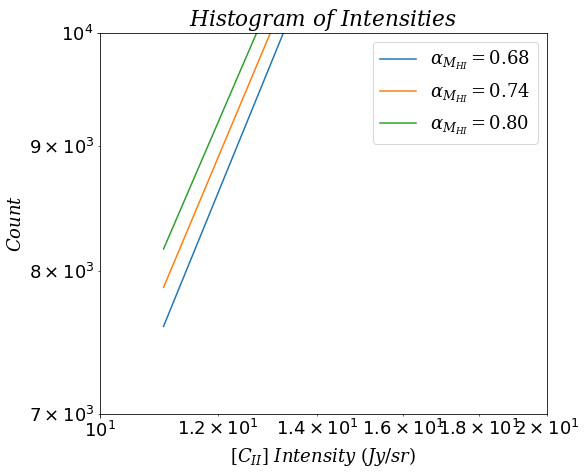

In [25]:
plt.plot(center, avg_mhi68, label = r'$\alpha_{M_{HI}} = 0.68$')
plt.plot(center, avg_mhi74, label = r'$\alpha_{M_{HI}} = 0.74$')
plt.plot(center, avg_mhi80, label = r'$\alpha_{M_{HI}} = 0.80$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()

plt.xlim([(10**1), 2*(10**1)])
plt.ylim([7*(10**3), (10**4)])

#plt.savefig('paper_figs/dsrel/alpha_mhi/alpha_mhi_hist_left.png', bbox_inches = 'tight')

(20000, 40000)

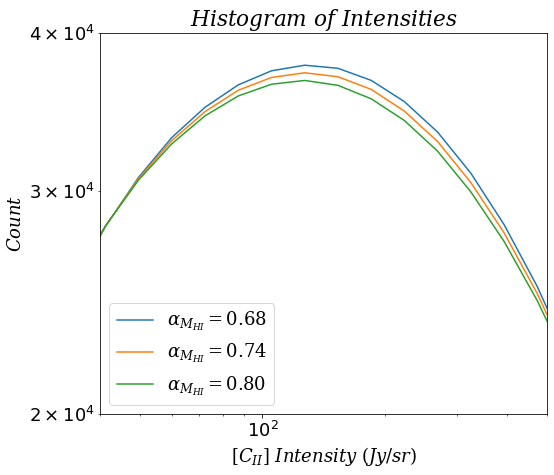

In [26]:
plt.plot(center, avg_mhi68, label = r'$\alpha_{M_{HI}} = 0.68$')
plt.plot(center, avg_mhi74, label = r'$\alpha_{M_{HI}} = 0.74$')
plt.plot(center, avg_mhi80, label = r'$\alpha_{M_{HI}} = 0.80$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()

plt.xlim([4*(10**1), 5*(10**2)])
plt.ylim([2*(10**4), 4*(10**4)])

#plt.savefig('paper_figs/dsrel/alpha_mhi/alpha_mhi_hist_top.png', bbox_inches = 'tight')

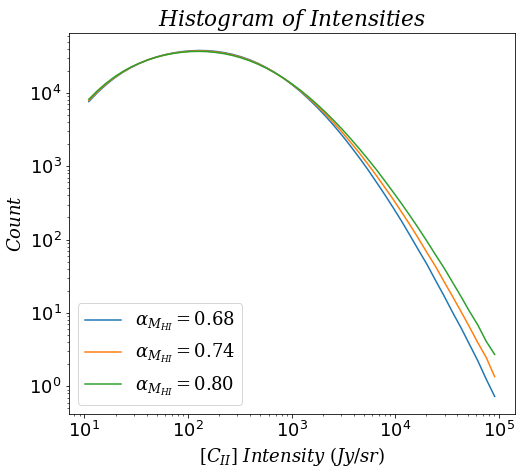

In [27]:
plt.plot(center, avg_mhi68, label = r'$\alpha_{M_{HI}} = 0.68$')
plt.plot(center, avg_mhi74, label = r'$\alpha_{M_{HI}} = 0.74$')
plt.plot(center, avg_mhi80, label = r'$\alpha_{M_{HI}} = 0.80$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()

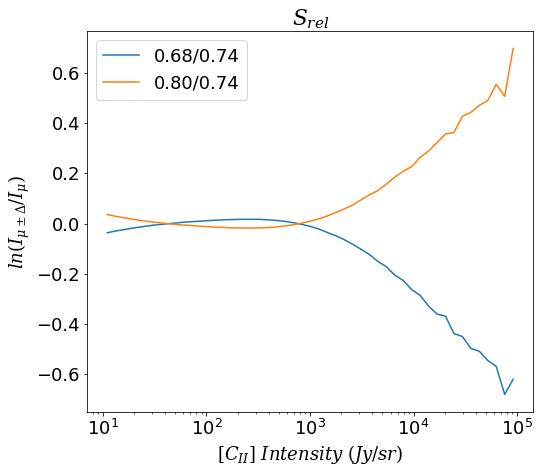

In [28]:
plt.plot(center, np.log(avg_mhi68/avg_mhi74), label = '0.68/0.74')
plt.plot(center, np.log(avg_mhi80/avg_mhi74), label = '0.80/0.74')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$ln(I_{\mu \pm \Delta}/I_{\mu})$')
plt.title(r'$S_{rel}$')
plt.xscale('log')


plt.legend()
#plt.savefig('paper_figs/dsrel/alpha_mhi_srel.png', bbox_inches = 'tight')

Investigation:

In [28]:
def MH1_fit(M, M_0, M_min, alphaMH1):
    x = M/M_min
    return M_0 * ((x)**alphaMH1) * np.exp(-1/((x)**0.35))

Loading .npz catalogues...


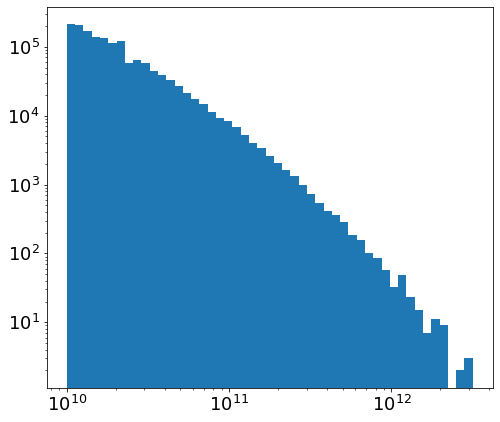

In [29]:
plt.hist(m_cii.halos.M, bins = np.logspace(10, 12.5, 50))
plt.xscale('log')
plt.yscale('log')

In [30]:
m_cii.model_par

{'zdex': 0.4,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.024,
 'BehrooziFile': 'sfr_reinterp.dat'}

In [46]:
M_0 = 1900000000.0
M_min = 20000000000
alpha_MHI = 0.74
halos_M = m_cii.halos.M
MHI_sing = MH1_fit(halos_M, M_0, M_min, alpha_MHI)
MHI_sing2 = MH1_fit(halos_M, M_0, M_min, 0.5)
MHI_sing3 = MH1_fit(halos_M, M_0, M_min, 0.6)
MHI_sing4 = MH1_fit(halos_M, M_0, M_min, 0.8)
MHI_sing5 = MH1_fit(halos_M, M_0, M_min, 0.9)

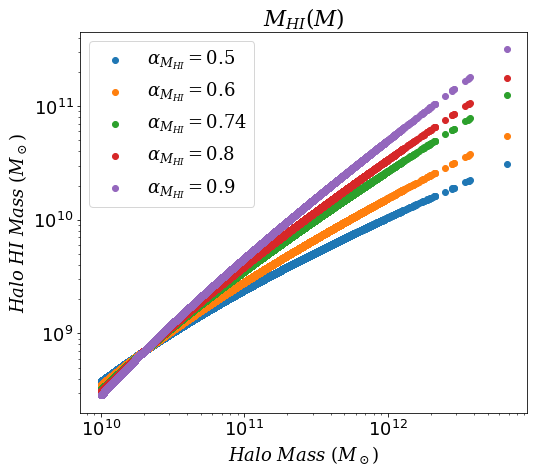

In [62]:
plt.scatter(halos_M, MHI_sing2, label = r'$\alpha_{M_{HI}}=0.5$')
plt.scatter(halos_M, MHI_sing3, label = r'$\alpha_{M_{HI}}=0.6$')
plt.scatter(halos_M, MHI_sing, label = r'$\alpha_{M_{HI}}=0.74$')
plt.scatter(halos_M, MHI_sing4, label = r'$\alpha_{M_{HI}}=0.8$')
plt.scatter(halos_M, MHI_sing5, label = r'$\alpha_{M_{HI}}=0.9$')

plt.xscale('log')
plt.yscale('log')

plt.ylabel(r'$Halo\ HI\ Mass\ (M_\odot)$')
plt.xlabel(r'$Halo\ Mass\ (M_\odot)$')
plt.title(r'$M_{HI}(M)$')
plt.legend()

plt.savefig('paper_figs/dsrel/alpha_mhi/mhi(m).png')

In [39]:
M_HIs = [0 for i in range(5)]
alpha_MHIs = np.array([0.5, 0.6, 0.74, 0.8, 0.9])
for i in range(5):
    M_HIs[i] = MH1_fit(halos_M, M_0, M_min, alpha_MHIs[i])

In [41]:
import random
rand_halos = random.sample([i for i in range(len(halos_M))], int(0.001*len(halos_M)))
rand_halos = np.array(rand_halos)

In [42]:
halos_M_rand = halos_M[rand_halos]
halos_MHI_rand = [0 for i in range(5)]
for i in range(5):
    halos_MHI_rand[i] = M_HIs[i][rand_halos]

$M_{min}$:

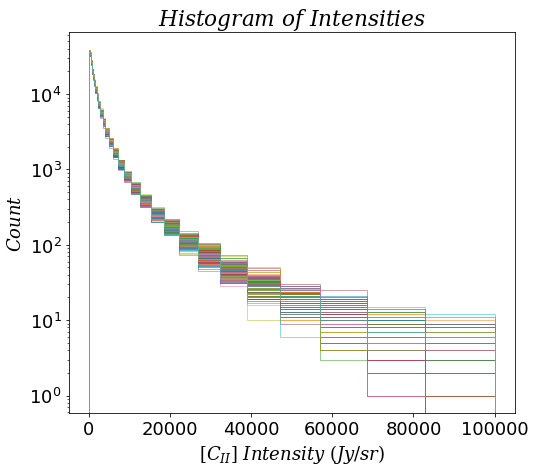

In [22]:
n_min99_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_mmin99 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e9-9/sig/cii_sig'+str(i)+'.npy')
    n_min99_tot[i], _, _ = plt.hist(sig_mmin99.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

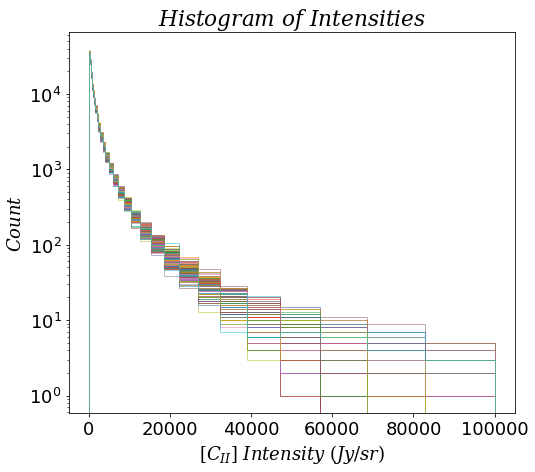

In [23]:
n_min01_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_mmin01 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10-1/sig/cii_sig'+str(i)+'.npy')
    n_min01_tot[i], _, _ = plt.hist(sig_mmin01.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [31]:
avg_min99 = np.nanmean(n_min99_tot, axis = 0)
avg_min01 = np.nanmean(n_min01_tot, axis = 0)
avg_min10 = avg_zdex04

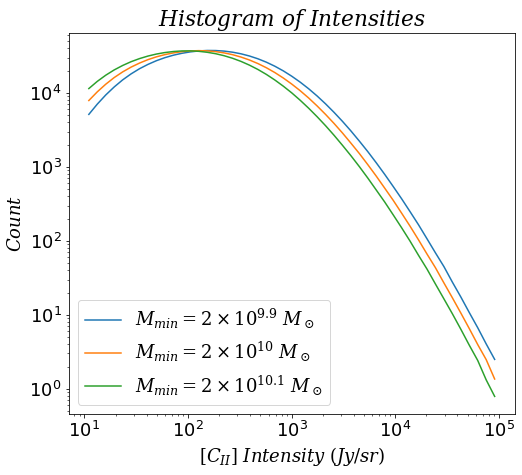

In [32]:
plt.plot(center, avg_min99, label = r'$M_{min} = 2 \times 10^{9.9}\ M_\odot$')
plt.plot(center, avg_min10, label = r'$M_{min} = 2 \times 10^{10}\ M_\odot$')
plt.plot(center, avg_min01, label = r'$M_{min} = 2 \times 10^{10.1}\ M_\odot$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()
#plt.savefig('paper_figs/dsrel/alpha_mmin_hist.png', bbox_inches = 'tight')

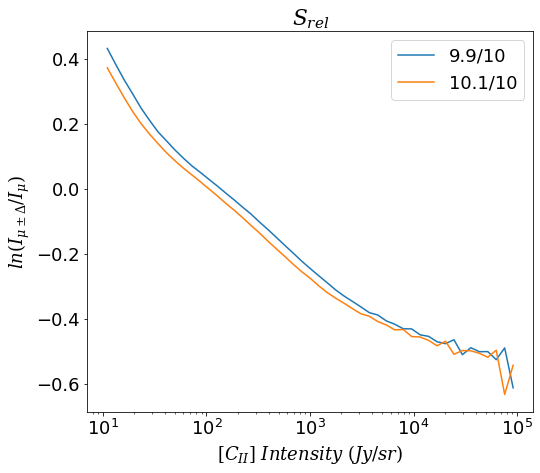

In [33]:
plt.plot(center,-np.log(avg_min99/avg_min10), label = '-9.9/10')
plt.plot(center, np.log(avg_min01/avg_min10), label = '10.1/10')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$ln(I_{\mu \pm \Delta}/I_{\mu})$')
plt.title(r'$S_{rel}$')
plt.xscale('log')


plt.legend()
#plt.savefig('paper_figs/dsrel/alpha_mmin_srel.png', bbox_inches = 'tight')

$\alpha_0$:

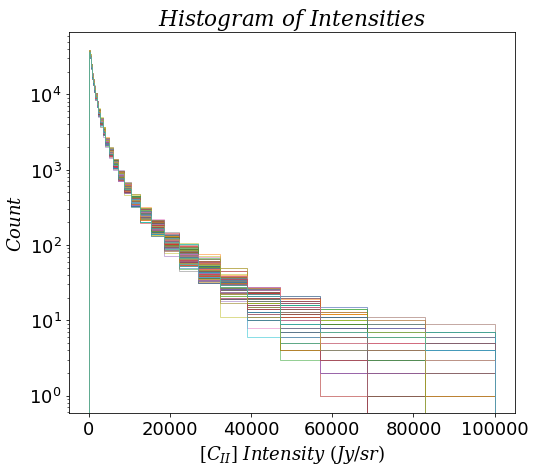

In [24]:
n_a013_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_ao13 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_312/sig/cii_sig'+str(i)+'.npy')
    n_a013_tot[i], _, _ = plt.hist(sig_ao13.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

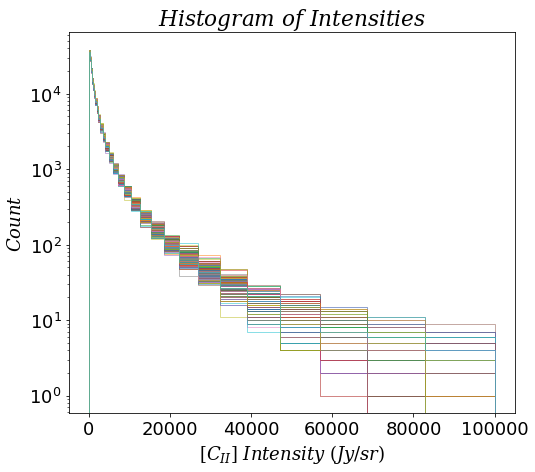

In [25]:
n_a015_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_ao15 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_512/sig/cii_sig'+str(i)+'.npy')
    n_a015_tot[i], bins, _ = plt.hist(sig_ao15.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [26]:
avg_a013 = np.nanmean(n_a013_tot, axis = 0)
avg_a014 = avg_zdex04
avg_a015 = np.nanmean(n_a015_tot, axis = 0)

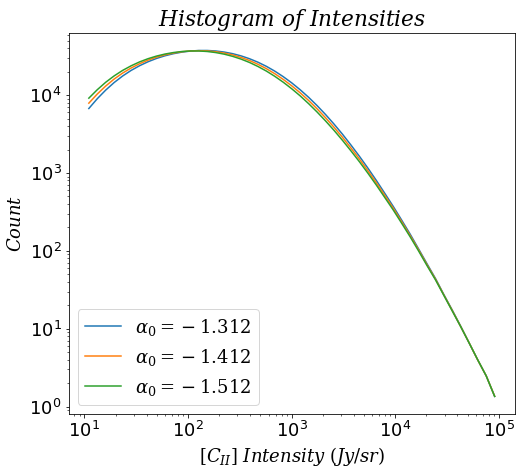

In [37]:
plt.plot(center, avg_a013, label = r'$\alpha_0 = -1.312$')
plt.plot(center, avg_a014, label = r'$\alpha_0 = -1.412$')
plt.plot(center, avg_a015, label = r'$\alpha_0 = -1.512$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()
#plt.savefig('paper_figs/dsrel/alpha_mmin_hist.png', bbox_inches = 'tight')

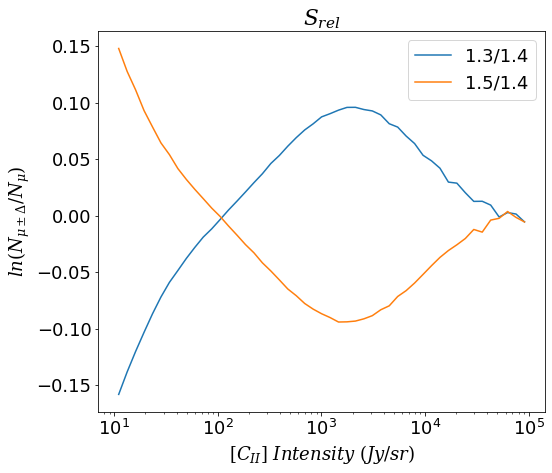

In [38]:
plt.plot(center, np.log(avg_a013/avg_a014), label = '1.3/1.4')
plt.plot(center, np.log(avg_a015/avg_a014), label = '1.5/1.4')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$ln(N_{\mu \pm \Delta}/N_{\mu})$')
plt.title(r'$S_{rel}$')
plt.xscale('log')


plt.legend()
#plt.savefig('paper_figs/dsrel/alpha_mmin_srel.png', bbox_inches = 'tight')

$\gamma_0$:

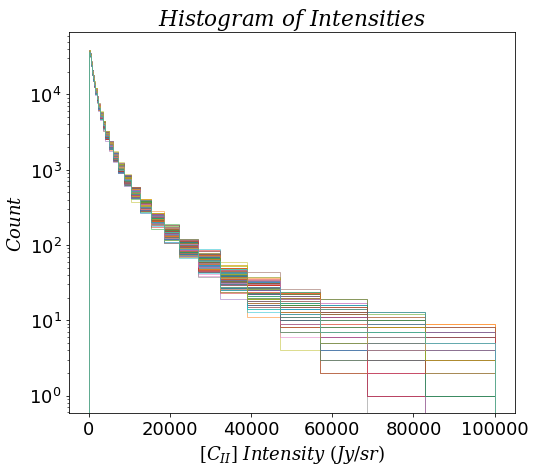

In [27]:
n_g27_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_g27 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_27/sig/cii_sig'+str(i)+'.npy')
    n_g27_tot[i], _, _ = plt.hist(sig_g27.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

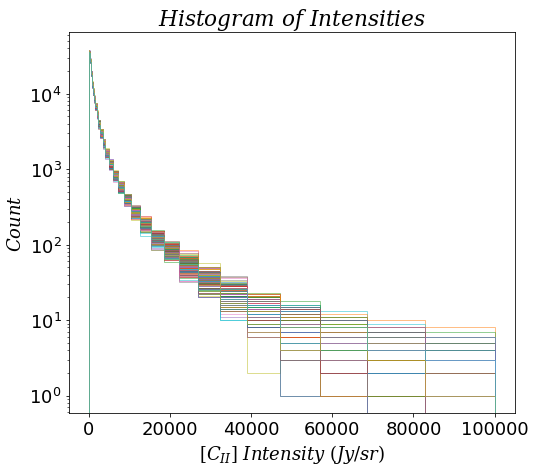

In [28]:
n_g35_tot = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    sig_g35 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_35/sig/cii_sig'+str(i)+'.npy')
    n_g35_tot[i], bins, _ = plt.hist(sig_g35.flatten(), bins = binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [29]:
avg_g27 = np.nanmean(n_g27_tot, axis = 0)
avg_g31 = avg_zdex04
avg_g35 = np.nanmean(n_g35_tot, axis = 0)

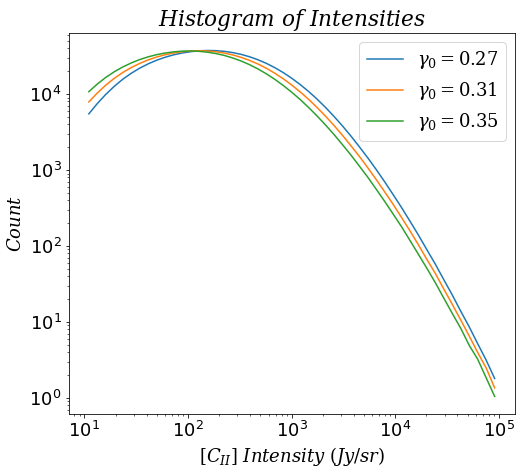

In [42]:
plt.plot(center, avg_g27, label = r'$\gamma_0 = 0.27$')
plt.plot(center, avg_g31, label = r'$\gamma_0 = 0.31$')
plt.plot(center, avg_g35, label = r'$\gamma_0 = 0.35$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()
#plt.savefig('paper_figs/dsrel/alpha_mmin_hist.png', bbox_inches = 'tight')

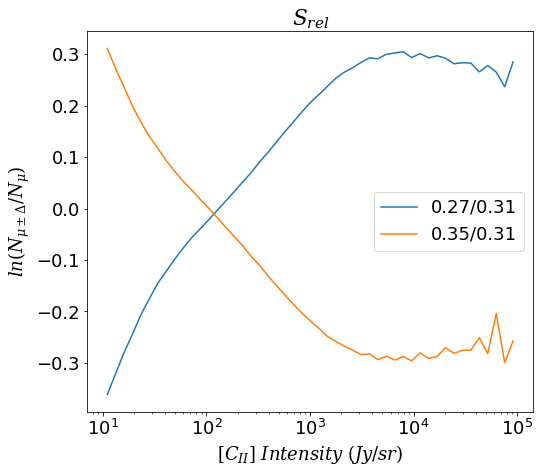

In [43]:
plt.plot(center, np.log(avg_g27/avg_g31), label = '0.27/0.31')
plt.plot(center, np.log(avg_g35/avg_g31), label = '0.35/0.31')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$ln(N_{\mu \pm \Delta}/N_{\mu})$')
plt.title(r'$S_{rel}$')
plt.xscale('log')


plt.legend()
#plt.savefig('paper_figs/dsrel/alpha_mmin_srel.png', bbox_inches = 'tight')

dSrel:

$zdex$: 0.4 $\pm$ 0.1

$\alpha_{[C_{II}]}$ : 0.024 $\pm$ 0.004

$\alpha_{M_{H_I}}$: 0.74 $\pm$ 0.6

$M_{min}$: 2 $\times 10^{10 \pm 0.1} M_\odot$

$\alpha_0$: -1.412 $\pm$ 0.1

$\gamma_0$: 0.31 $\pm$ 0.04

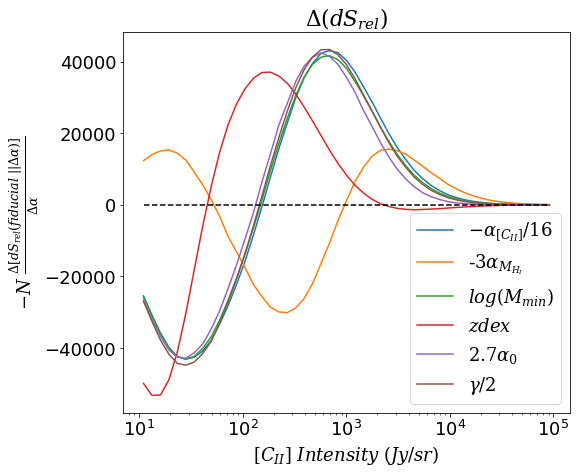

In [32]:
plt.plot(center, avg_a24*(np.log(avg_a28/avg_a24) - np.log(avg_a20/avg_a24))/(0.008*16), label = r'$-\alpha_{[C_{II}]}/16$')
plt.plot(center, 3*avg_mhi74*(np.log(avg_mhi80/avg_mhi74) - np.log(avg_mhi68/avg_mhi74))/0.12, label = r'-$3\alpha_{M_{H_I}}$')
plt.plot(center, -avg_min10*(np.log(avg_min01/avg_min10) - np.log(avg_min99/avg_min10))/((10.1) - 9.9), label = r'$log(M_{min})$')
plt.plot(center, -avg_zdex04*(np.log(avg_zdex05/avg_zdex04) - np.log(avg_zdex03/avg_zdex04))/0.2, label = r'$zdex$')
plt.plot(center, -2.7*avg_a014*(np.log(avg_a015/avg_a014) - np.log(avg_a013/avg_a014))/0.2, label = r'$2.7\alpha_0$')
plt.plot(center, -0.5*avg_g31*(np.log(avg_g35/avg_g31) - np.log(avg_g27/avg_g31))/0.08, label = r'$\gamma/2$')


plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$-N\ \frac{\Delta [dS_{rel}(fiducial\ \vert \vert \Delta \alpha)]}{\Delta \alpha}$')
plt.title(r'$\Delta(dS_{rel})$')
plt.xscale('log')
#plt.yscale('log')
plt.hlines(y = 0, xmin = center[0], xmax = center[-1], linestyle = '--', color = 'k')
plt.legend()

#plt.savefig('paper_figs/dsrel/drel_sig_v2.png', bbox_inches = 'tight')

In [33]:
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/sig/n_avg_basis.npy', avg_zdex04)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/sig/n_avg_zdex0-3.npy', avg_zdex03)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/sig/n_avg_zdex0-5.npy', avg_zdex05)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/sig/n_avg_acii0-020.npy', avg_a20)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/sig/n_avg_acii0-028.npy', avg_a28)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/sig/n_avg_mhi0-68.npy', avg_mhi68)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/sig/n_avg_mhi0-80.npy', avg_mhi80)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/sig/n_avg_logmmin9-9.npy', avg_min99)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/sig/n_avg_logmmin10-1.npy', avg_min01)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/sig/n_avg_a0_-1-312.npy', avg_a013)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/sig/n_avg_a0_-1-512.npy', avg_a015)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/sig/n_avg_g0_0-27.npy', avg_g27)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/sig/n_avg_g0_0-35.npy', avg_g35)

In [34]:
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/sig/log_center.npy', center)

Forecasts:

$zdex$:

In [35]:
lin_binning = np.linspace(-4*10**(4), 4*10**(4), 80)
lin_center = (lin_binning[:-1] + lin_binning[1:]) / 2

In [36]:
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/for/for_tobs40kh/lin_center.npy', lin_center)

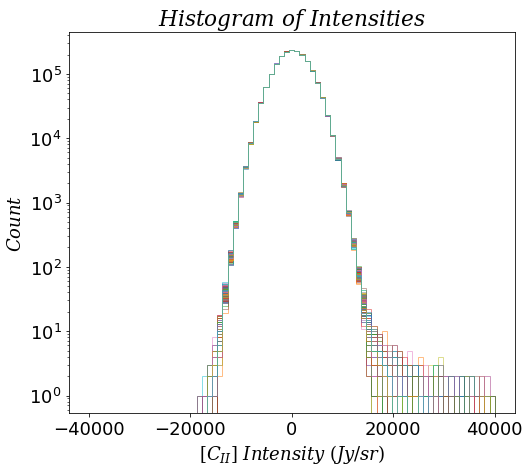

In [128]:
n_zdex04_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_nuObs270 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/for/for_tobs40kh_alt/cii_for'+str(i)+'.npy')
    n_zdex04_tot_for[i], _, _ = plt.hist(for_nuObs270.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

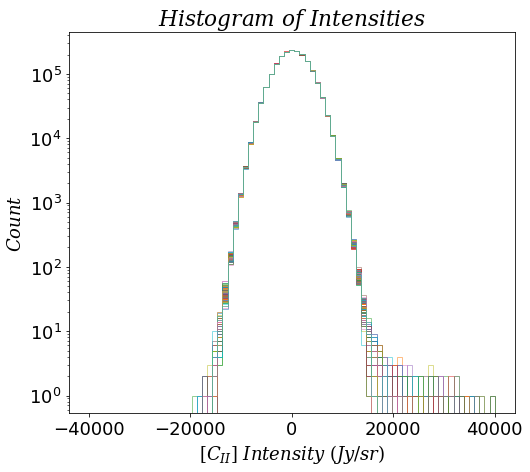

In [129]:
n_zdex03_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_zdex03 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex03/for/for_tobs40kh_alt/cii_for'+str(i)+'.npy')
    n_zdex03_tot_for[i], _, _ = plt.hist(for_zdex03.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

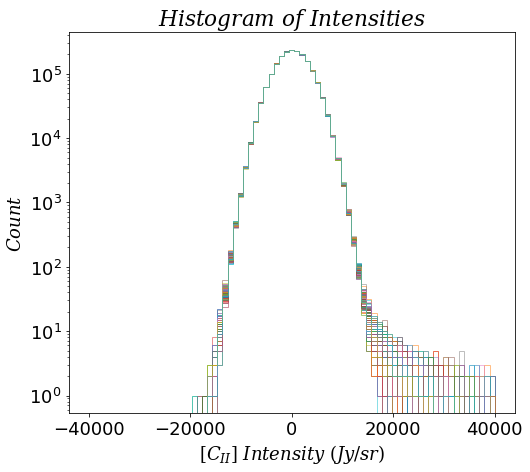

In [130]:
n_zdex05_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_zdex05 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex05/for/for_tobs40kh_alt/cii_for'+str(i)+'.npy')
    n_zdex05_tot_for[i], _, _ = plt.hist(for_zdex05.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [131]:
avg_zdex03_for = np.nanmean(n_zdex03_tot_for, axis = 0)
avg_zdex04_for = np.nanmean(n_zdex04_tot_for, axis = 0)
avg_zdex05_for = np.nanmean(n_zdex05_tot_for, axis = 0)

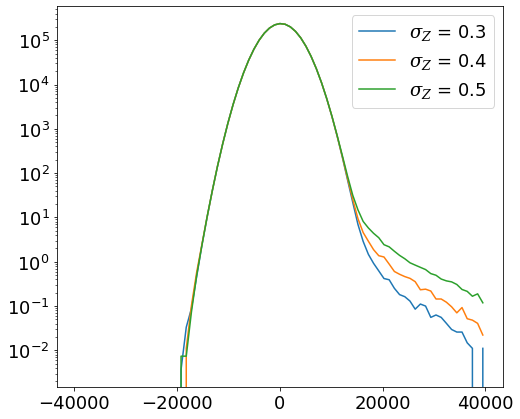

In [132]:
plt.plot(lin_center, avg_zdex03_for, label='$\sigma_Z$ = 0.3')
plt.plot(lin_center, avg_zdex04_for, label='$\sigma_Z$ = 0.4')
plt.plot(lin_center, avg_zdex05_for, label='$\sigma_Z$ = 0.5')
plt.yscale('log')
plt.legend()

/tmp/ipykernel_2177858/1853769590.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(lin_center, np.log(avg_zdex03_for/avg_zdex04_for), label = '0.3/0.4')
/tmp/ipykernel_2177858/1853769590.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(lin_center, np.log(avg_zdex03_for/avg_zdex04_for), label = '0.3/0.4')
/tmp/ipykernel_2177858/1853769590.py:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(lin_center, np.log(avg_zdex05_for/avg_zdex04_for), label = '0.5/0.4')
/tmp/ipykernel_2177858/1853769590.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(lin_center, np.log(avg_zdex05_for/avg_zdex04_for), label = '0.5/0.4')


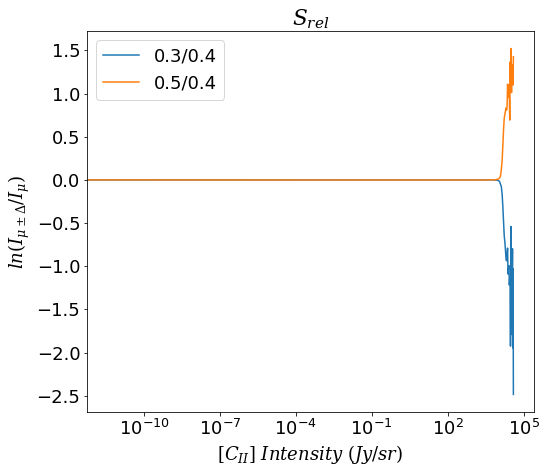

In [63]:
plt.plot(lin_center, np.log(avg_zdex03_for/avg_zdex04_for), label = '0.3/0.4')
plt.plot(lin_center, np.log(avg_zdex05_for/avg_zdex04_for), label = '0.5/0.4')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$ln(I_{\mu \pm \Delta}/I_{\mu})$')
plt.title(r'$S_{rel}$')
plt.xscale('log')


plt.legend()

$\alpha_{[C_{II}]}$:

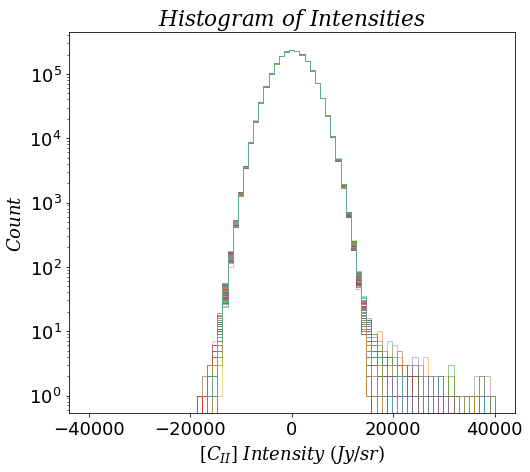

In [41]:
n_a20_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_a20 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-020/for/for_tobs40kh/cii_for'+str(i)+'.npy')
    n_a20_tot_for[i], _, _ = plt.hist(for_a20.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

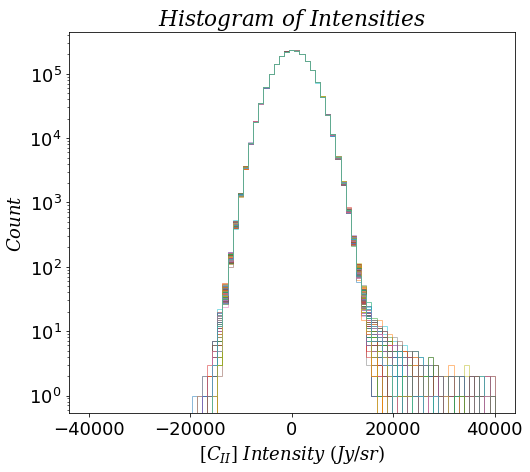

In [42]:
n_a28_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_a28 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-028/for/for_tobs40kh/cii_for'+str(i)+'.npy')
    n_a28_tot_for[i], _, _ = plt.hist(for_a28.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [43]:
avg_a20_for = np.nanmean(n_a20_tot_for, axis = 0)
avg_a24_for = avg_zdex04_for
avg_a28_for = np.nanmean(n_a28_tot_for, axis = 0)

$\alpha_{MHI}$

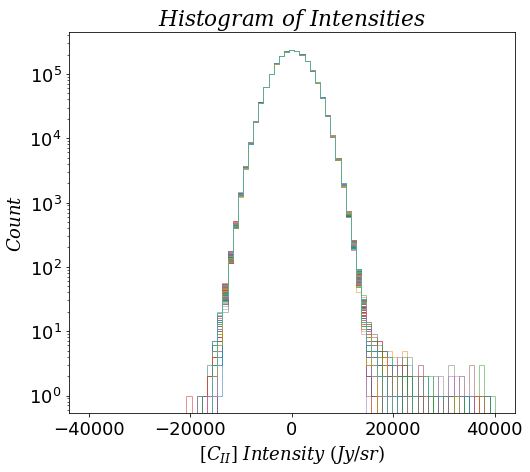

In [44]:
n_mhi68_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_mhi68 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-68/for/for_tobs40kh/cii_for'+str(i)+'.npy')
    n_mhi68_tot_for[i], _, _ = plt.hist(for_mhi68.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

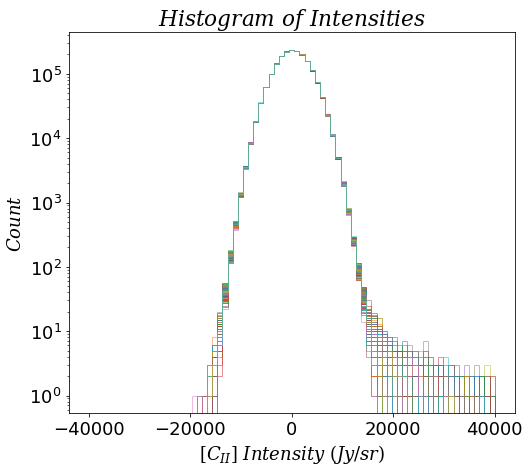

In [45]:
n_mhi80_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_mhi80 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-80/for/for_tobs40kh/cii_for'+str(i)+'.npy')
    n_mhi80_tot_for[i], _, _ = plt.hist(for_mhi80.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [46]:
avg_mhi68_for = np.nanmean(n_mhi68_tot_for, axis = 0)
avg_mhi74_for = avg_zdex04_for
avg_mhi80_for = np.nanmean(n_mhi80_tot_for, axis = 0)

$M_{min}$:

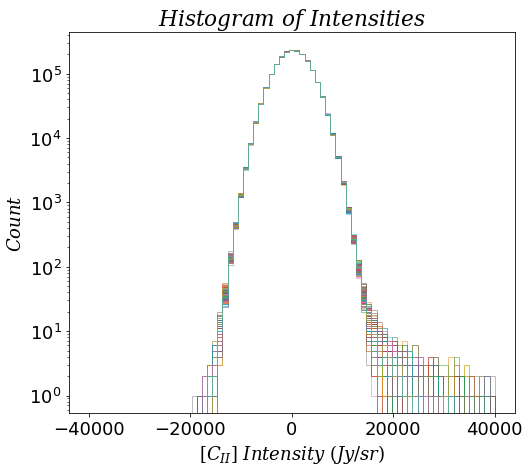

In [47]:
n_min99_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_mmin99 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e9-9/for/for_tobs40kh/cii_for'+str(i)+'.npy')
    n_min99_tot_for[i], _, _ = plt.hist(for_mmin99.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

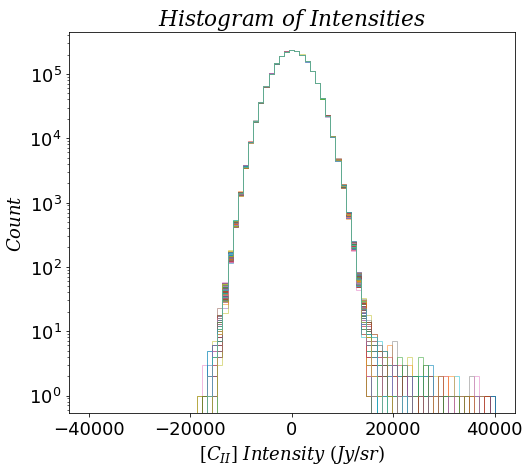

In [48]:
n_min01_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_mmin01 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10-1/for/for_tobs40kh/cii_for'+str(i)+'.npy')
    n_min01_tot_for[i], _, _ = plt.hist(for_mmin01.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [49]:
avg_min99_for = np.nanmean(n_min99_tot_for, axis = 0)
avg_min10_for = avg_zdex04_for
avg_min01_for = np.nanmean(n_min01_tot_for, axis = 0)

$\alpha_0$:

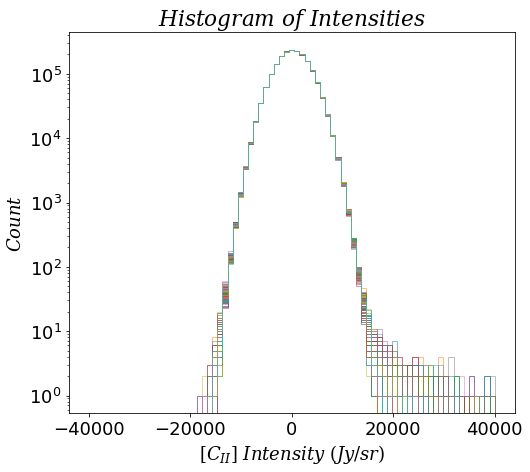

In [50]:
n_a013_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_ao13 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_312/for/for_tobs40kh/cii_for'+str(i)+'.npy')
    n_a013_tot_for[i], _, _ = plt.hist(for_ao13.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

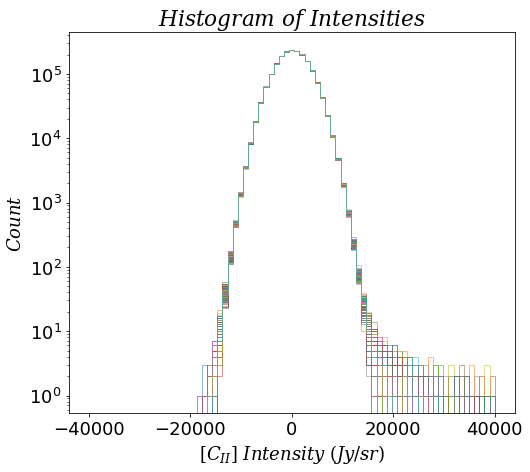

In [51]:
n_a015_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_ao15 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_512/for/for_tobs40kh/cii_for'+str(i)+'.npy')
    n_a015_tot_for[i], _, _ = plt.hist(for_ao15.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [52]:
avg_a013_for = np.nanmean(n_a013_tot_for, axis = 0)
avg_a014_for = avg_zdex04_for
avg_a015_for = np.nanmean(n_a015_tot_for, axis = 0)

$\gamma_0$:

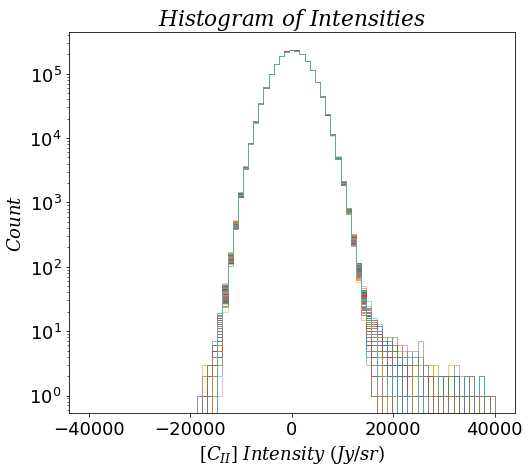

In [53]:
n_g27_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_g27 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_27/for/for_tobs40kh/cii_for'+str(i)+'.npy')
    n_g27_tot_for[i], _, _ = plt.hist(for_g27.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

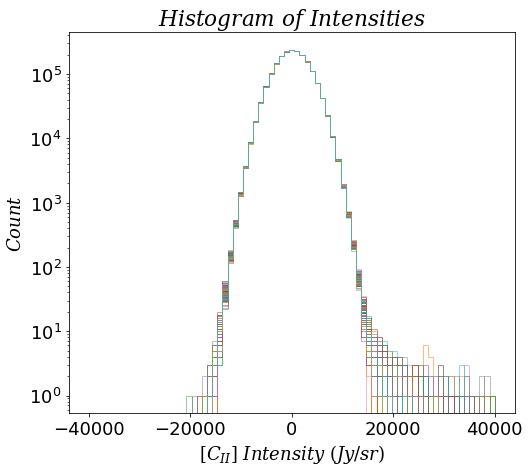

In [54]:
n_g35_tot_for = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for_g35 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_35/for/for_tobs40kh/cii_for'+str(i)+'.npy')
    n_g35_tot_for[i], _, _ = plt.hist(for_g35.flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [55]:
avg_g27_for = np.nanmean(n_g27_tot_for, axis = 0)
avg_g31_for = avg_zdex04_for
avg_g35_for = np.nanmean(n_g35_tot_for, axis = 0)

Combined:

/tmp/ipykernel_2177858/4025620856.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(lin_center, avg_a24_for*(np.log(avg_a28_for/avg_a24_for) - np.log(avg_a20_for/avg_a24_for))/(0.008*16), label = r'$-16\alpha_{[C_{II}]}$')
/tmp/ipykernel_2177858/4025620856.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(lin_center, avg_a24_for*(np.log(avg_a28_for/avg_a24_for) - np.log(avg_a20_for/avg_a24_for))/(0.008*16), label = r'$-16\alpha_{[C_{II}]}$')
/tmp/ipykernel_2177858/4025620856.py:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(lin_center, -avg_mhi74_for*(np.log(avg_mhi80_for/avg_mhi74_for) - np.log(avg_mhi68_for/avg_mhi74_for))/0.12, label = r'$\alpha_{M_{H_I}}$')
/tmp/ipykernel_2177858/4025620856.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(lin_center, -avg_mhi74_for*(np.log(avg_mhi80_for/avg_mhi74_for) - np.log(avg_mhi68_for/avg_mhi74_for))/0.12, label = r'$\alpha_{M_{H_I}}$')
/tmp/ipykernel_2

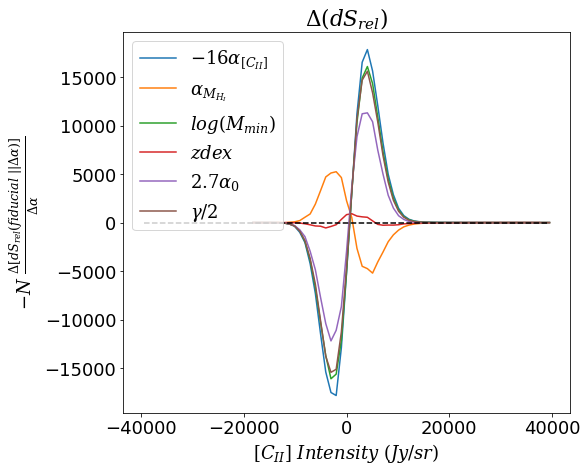

In [133]:
plt.plot(lin_center, avg_a24_for*(np.log(avg_a28_for/avg_a24_for) - np.log(avg_a20_for/avg_a24_for))/(0.008*16), label = r'$-16\alpha_{[C_{II}]}$')
plt.plot(lin_center, -avg_mhi74_for*(np.log(avg_mhi80_for/avg_mhi74_for) - np.log(avg_mhi68_for/avg_mhi74_for))/0.12, label = r'$\alpha_{M_{H_I}}$')
plt.plot(lin_center, -avg_min10_for*(np.log(avg_min01_for/avg_min10_for) - np.log(avg_min99_for/avg_min10_for))/((10.1) - 9.9), label = r'$log(M_{min})$')
plt.plot(lin_center, -avg_zdex04_for*(np.log(avg_zdex05_for/avg_zdex04_for) - np.log(avg_zdex03_for/avg_zdex04_for))/0.2, label = r'$zdex$')
plt.plot(lin_center, -2.7*avg_a014_for*(np.log(avg_a015_for/avg_a014_for) - np.log(avg_a013_for/avg_a014_for))/0.2, label = r'$2.7\alpha_0$')
plt.plot(lin_center, -0.5*avg_g31_for*(np.log(avg_g35_for/avg_g31_for) - np.log(avg_g27_for/avg_g31_for))/0.08, label = r'$\gamma/2$')


plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$-N\ \frac{\Delta [dS_{rel}(fiducial\ \vert \vert \Delta \alpha)]}{\Delta \alpha}$')
plt.title(r'$\Delta(dS_{rel})$')
#plt.xscale('log')
#plt.yscale('log')
plt.hlines(y = 0, xmin = lin_center[0], xmax = lin_center[-1], linestyle = '--', color = 'k')
plt.legend()

#plt.savefig('paper_figs/dsrel/drel_sig_v2.png', bbox_inches = 'tight')

/tmp/ipykernel_2177858/1485768498.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(lin_center, avg_a24_for*(np.log(avg_a28_for/avg_a24_for) - np.log(avg_a20_for/avg_a24_for))/(0.008*16), label = r'$-\alpha_{[C_{II}]}/16$')
/tmp/ipykernel_2177858/1485768498.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(lin_center, avg_a24_for*(np.log(avg_a28_for/avg_a24_for) - np.log(avg_a20_for/avg_a24_for))/(0.008*16), label = r'$-\alpha_{[C_{II}]}/16$')
/tmp/ipykernel_2177858/1485768498.py:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(lin_center, 3*avg_mhi74_for*(np.log(avg_mhi80_for/avg_mhi74_for) - np.log(avg_mhi68_for/avg_mhi74_for))/0.12, label = r'$-3\alpha_{M_{H_I}}$')
/tmp/ipykernel_2177858/1485768498.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(lin_center, 3*avg_mhi74_for*(np.log(avg_mhi80_for/avg_mhi74_for) - np.log(avg_mhi68_for/avg_mhi74_for))/0.12, label = r'$-3\alpha_{M_{H_I}}$')
/tmp/ipy

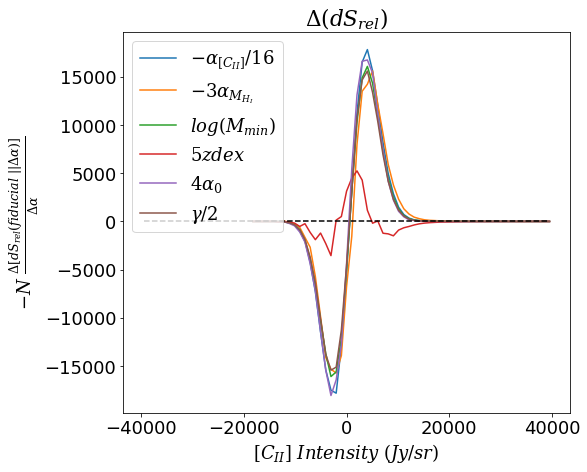

In [58]:
plt.plot(lin_center, avg_a24_for*(np.log(avg_a28_for/avg_a24_for) - np.log(avg_a20_for/avg_a24_for))/(0.008*16), label = r'$-\alpha_{[C_{II}]}/16$')
plt.plot(lin_center, 3*avg_mhi74_for*(np.log(avg_mhi80_for/avg_mhi74_for) - np.log(avg_mhi68_for/avg_mhi74_for))/0.12, label = r'$-3\alpha_{M_{H_I}}$')
plt.plot(lin_center, -avg_min10_for*(np.log(avg_min01_for/avg_min10_for) - np.log(avg_min99_for/avg_min10_for))/((10.1) - 9.9), label = r'$log(M_{min})$')
plt.plot(lin_center, -5*avg_zdex04_for*(np.log(avg_zdex05_for/avg_zdex04_for) - np.log(avg_zdex03_for/avg_zdex04_for))/0.2, label = r'$5zdex$')
plt.plot(lin_center, -4*avg_a014_for*(np.log(avg_a015_for/avg_a014_for) - np.log(avg_a013_for/avg_a014_for))/0.2, label = r'$4\alpha_0$')
plt.plot(lin_center, -0.5*avg_g31_for*(np.log(avg_g35_for/avg_g31_for) - np.log(avg_g27_for/avg_g31_for))/0.08, label = r'$\gamma/2$')


plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$-N\ \frac{\Delta [dS_{rel}(fiducial\ \vert \vert \Delta \alpha)]}{\Delta \alpha}$')
plt.title(r'$\Delta(dS_{rel})$')
#plt.xscale('log')
#plt.yscale('log')
plt.hlines(y = 0, xmin = lin_center[0], xmax = lin_center[-1], linestyle = '--', color = 'k')
plt.legend()

#plt.savefig('paper_figs/dsrel/drel_sig_v2.png', bbox_inches = 'tight')

In [59]:
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/for/for_tobs40kh/n_avg_basis.npy', avg_zdex04_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/for/for_tobs40kh/n_avg_zdex0-3.npy', avg_zdex03_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/for/for_tobs40kh/n_avg_zdex0-5.npy', avg_zdex05_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/for/for_tobs40kh/n_avg_acii0-020.npy', avg_a20_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/for/for_tobs40kh/n_avg_acii0-028.npy', avg_a28_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/for/for_tobs40kh/n_avg_mhi0-68.npy', avg_mhi68_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/for/for_tobs40kh/n_avg_mhi0-80.npy', avg_mhi80_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/for/for_tobs40kh/n_avg_logmmin9-9.npy', avg_min99_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/for/for_tobs40kh/n_avg_logmmin10-1.npy', avg_min01_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/for/for_tobs40kh/n_avg_a0_-1-312.npy', avg_a013_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/for/for_tobs40kh/n_avg_a0_-1-512.npy', avg_a015_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/for/for_tobs40kh/n_avg_g0_0-27.npy', avg_g27_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/for/for_tobs40kh/n_avg_g0_0-35.npy', avg_g35_for)

In [135]:
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/for/for_tobs40kh/n_avg_basis_alt.npy', avg_zdex04_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/for/for_tobs40kh/n_avg_zdex0-3_alt.npy', avg_zdex03_for)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/for/for_tobs40kh/n_avg_zdex0-5_alt.npy', avg_zdex05_for)

In [60]:
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/for/for_tobs40kh/lin_center.npy', lin_center)

## Beamed signal:

In [81]:
beam_binning = np.logspace(0, np.log10(25000), 50)
beam_center = (beam_binning[:-1] + beam_binning[1:]) / 2

In [82]:
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam/pix_0-5/beam_center.npy', beam_center)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam/pix_1/beam_center.npy', beam_center)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam/pix_2/beam_center.npy', beam_center)

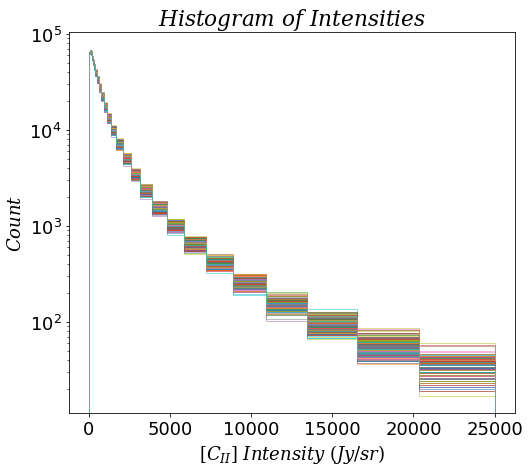

In [136]:
n_zdex04_beam = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    beam_nuObs270 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/beam/pix_0-5/cii_beam'+str(i)+'.npy')
    n_zdex04_beam[i], _, _ = plt.hist(beam_nuObs270.flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

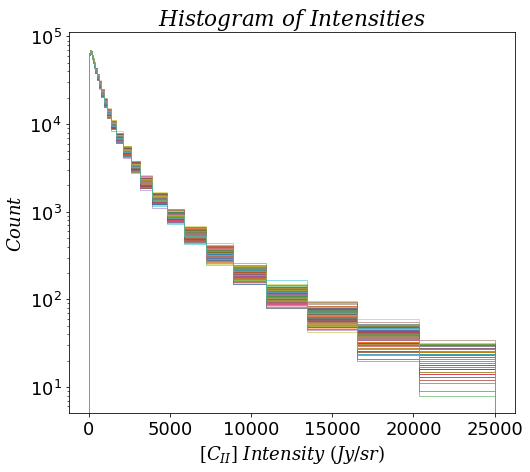

In [137]:
n_zdex03_beam = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    beam_zdex03 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex03/beam/pix_0-5/cii_beam'+str(i)+'.npy')
    n_zdex03_beam[i], _, _ = plt.hist(beam_zdex03.flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

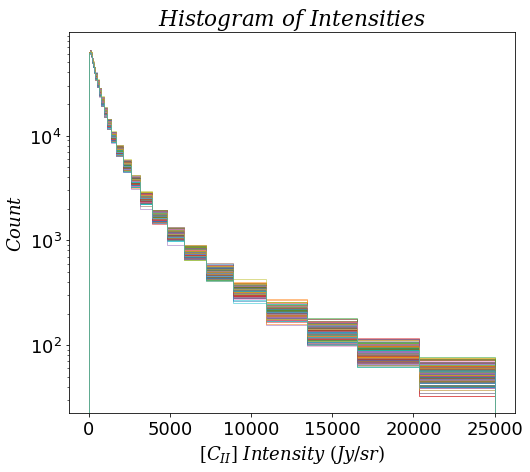

In [138]:
n_zdex05_beam = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    beam_zdex05 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex05/beam/pix_0-5/cii_beam'+str(i)+'.npy')
    n_zdex05_beam[i], _, _ = plt.hist(beam_zdex05.flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [139]:
avg_z03_beam = np.nanmean(n_zdex03_beam, axis = 0)
avg_z04_beam = np.nanmean(n_zdex04_beam, axis = 0)
avg_z05_beam = np.nanmean(n_zdex05_beam, axis = 0)

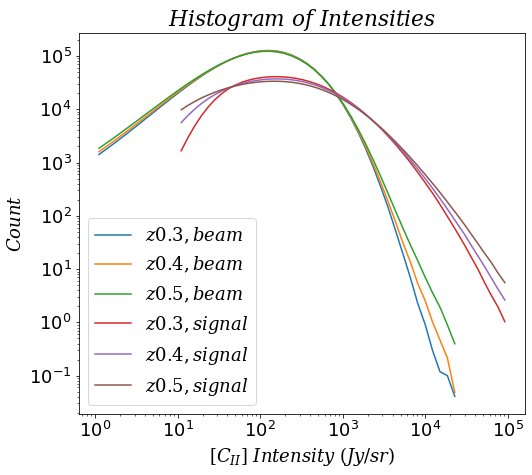

In [117]:
plt.plot(beam_center, avg_z03_beam, label = r'$z0.3, beam$')
plt.plot(beam_center, avg_z04_beam, label = r'$z0.4, beam$')
plt.plot(beam_center, avg_z05_beam, label = r'$z0.5, beam$')

plt.plot(center, avg_zdex03, label = r'$z0.3, signal$')
plt.plot(center, avg_zdex04, label = r'$z0.4, signal$')
plt.plot(center, avg_zdex05, label = r'$z0.5, signal$')


plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()

$\alpha_{[C_{II}]}$

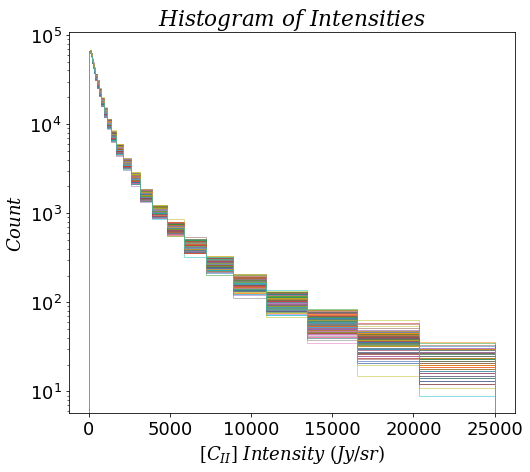

In [140]:
n_a20_beam = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    beam_a20 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-020/beam/pix_0-5/cii_beam'+str(i)+'.npy')
    n_a20_beam[i], _, _ = plt.hist(beam_a20.flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

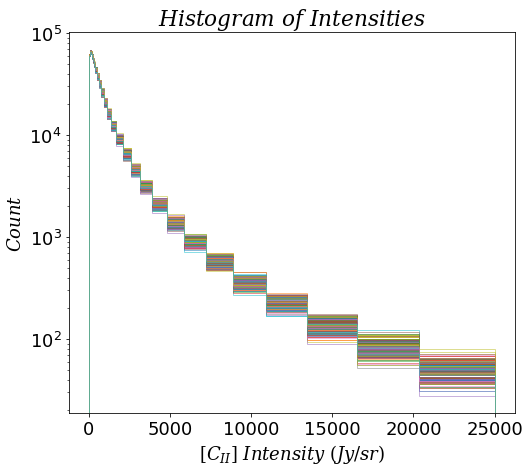

In [141]:
n_a28_beam = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    beam_a28 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-028/beam/pix_0-5/cii_beam'+str(i)+'.npy')
    n_a28_beam[i], _, _ = plt.hist(beam_a28.flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [142]:
avg_a20_beam = np.nanmean(n_a20_beam, axis = 0)
avg_a24_beam = avg_z04_beam
avg_a28_beam = np.nanmean(n_a28_beam, axis = 0)

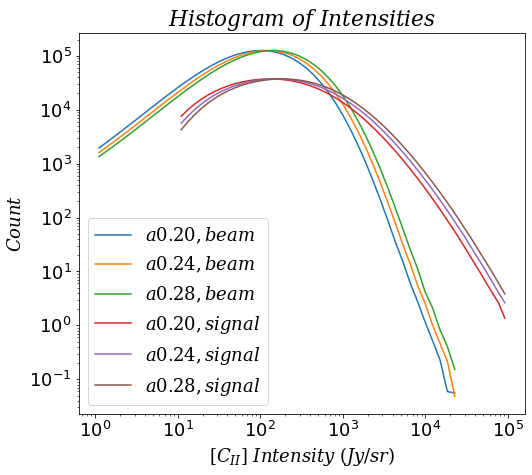

In [121]:
plt.plot(beam_center, avg_a20_beam, label = r'$a0.20, beam$')
plt.plot(beam_center, avg_a24_beam, label = r'$a0.24, beam$')
plt.plot(beam_center, avg_a28_beam, label = r'$a0.28, beam$')

plt.plot(center, avg_a20, label = r'$a0.20, signal$')
plt.plot(center, avg_a24, label = r'$a0.24, signal$')
plt.plot(center, avg_a28, label = r'$a0.28, signal$')


plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()

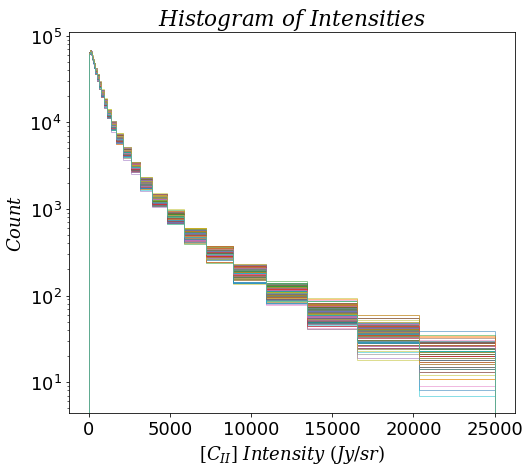

In [143]:
n_mhi68_beam = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    beam_mhi68 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-68/beam/pix_0-5/cii_beam'+str(i)+'.npy')
    n_mhi68_beam[i], _, _ = plt.hist(beam_mhi68.flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

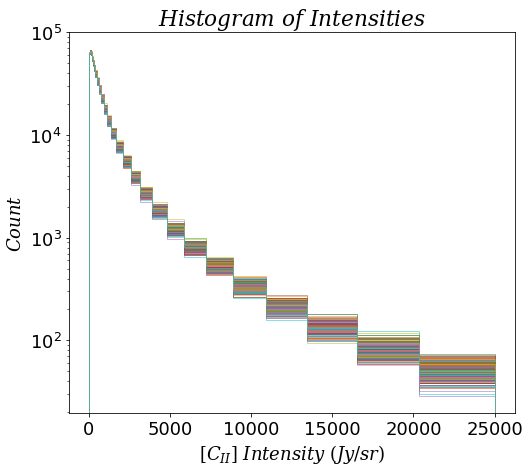

In [144]:
n_mhi80_beam = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    beam_mhi80 = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-80/beam/pix_0-5/cii_beam'+str(i)+'.npy')
    n_mhi80_beam[i], _, _ = plt.hist(beam_mhi80.flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [145]:
avg_mhi68_beam = np.nanmean(n_mhi68_beam, axis = 0)
avg_mhi74_beam = avg_z04_beam
avg_mhi80_beam = np.nanmean(n_mhi80_beam, axis = 0)

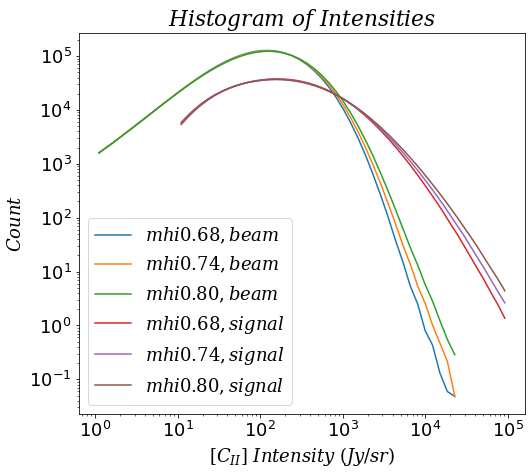

In [125]:
plt.plot(beam_center, avg_mhi68_beam, label = r'$mhi0.68, beam$')
plt.plot(beam_center, avg_mhi74_beam, label = r'$mhi0.74, beam$')
plt.plot(beam_center, avg_mhi80_beam, label = r'$mhi0.80, beam$')

plt.plot(center, avg_mhi68, label = r'$mhi0.68, signal$')
plt.plot(center, avg_mhi74, label = r'$mhi0.74, signal$')
plt.plot(center, avg_mhi80, label = r'$mhi0.80, signal$')


plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
plt.xscale('log')

plt.legend()

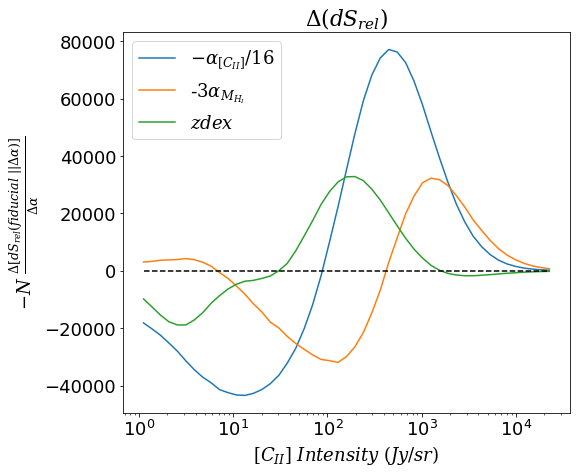

In [146]:
plt.plot(beam_center, avg_a24_beam*(np.log(avg_a28_beam/avg_a24_beam) - np.log(avg_a20_beam/avg_a24_beam))/(0.008*16), label = r'$-\alpha_{[C_{II}]}/16$')
plt.plot(beam_center, 3*avg_mhi74_beam*(np.log(avg_mhi80_beam/avg_mhi74_beam) - np.log(avg_mhi68_beam/avg_mhi74_beam))/0.12, label = r'-$3\alpha_{M_{H_I}}$')
plt.plot(beam_center, -avg_z04_beam*(np.log(avg_z05_beam/avg_z04_beam) - np.log(avg_z03_beam/avg_z04_beam))/0.2, label = r'$zdex$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$-N\ \frac{\Delta [dS_{rel}(fiducial\ \vert \vert \Delta \alpha)]}{\Delta \alpha}$')
plt.title(r'$\Delta(dS_{rel})$')
plt.xscale('log')
#plt.yscale('log')
plt.hlines(y = 0, xmin = beam_center[0], xmax = beam_center[-1], linestyle = '--', color = 'k')
plt.legend()

#plt.savefig('paper_figs/dsrel/drel_sig_v2.png', bbox_inches = 'tight')

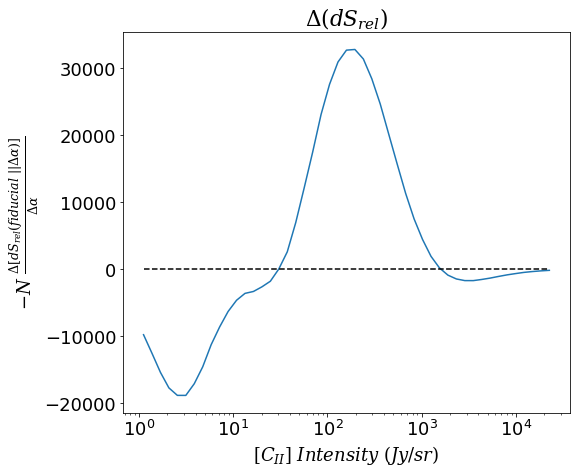

In [147]:
plt.plot(beam_center, -avg_z04_beam*(np.log(avg_z05_beam/avg_z04_beam) - np.log(avg_z03_beam/avg_z04_beam))/0.2)

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$-N\ \frac{\Delta [dS_{rel}(fiducial\ \vert \vert \Delta \alpha)]}{\Delta \alpha}$')
plt.title(r'$\Delta(dS_{rel})$')
plt.xscale('log')
#plt.yscale('log')
plt.hlines(y = 0, xmin = beam_center[0], xmax = beam_center[-1], linestyle = '--', color = 'k')

In [251]:
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_basis.npy', avg_z04_beam)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_zdex0-3.npy', avg_z04_beam)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_zdex0-5.npy', avg_z05_beam)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_acii0-020.npy', avg_a20_beam)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_acii0-028.npy', avg_a28_beam)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_mhi0-68.npy', avg_mhi68_beam)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_mhi0-80.npy', avg_mhi80_beam)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_logmmin9-9.npy', avg_min99_beam)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_logmmin10-1.npy', avg_min01_beam)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_a0_-1-312.npy', avg_a013_beam)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_a0_-1-512.npy', avg_a015_beam)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_g0_0-27.npy', avg_g27_beam)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/beam/pix_1/n_avg_g0_0-35.npy', avg_g35_beam)

In [126]:
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam/pix_2/n_avg_basis.npy', avg_z04_beam)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam/pix_2/n_avg_zdex0-3.npy', avg_z04_beam)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam/pix_2/n_avg_zdex0-5.npy', avg_z05_beam)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam/pix_2/n_avg_acii0-020.npy', avg_a20_beam)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam/pix_2/n_avg_acii0-028.npy', avg_a28_beam)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam/pix_2/n_avg_mhi0-68.npy', avg_mhi68_beam)
np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam/pix_2/n_avg_mhi0-80.npy', avg_mhi80_beam)

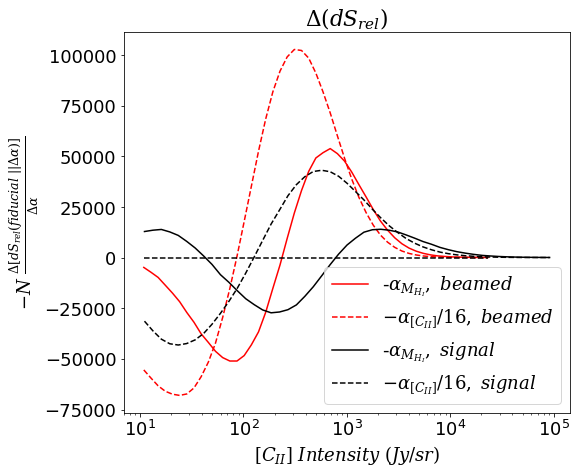

In [169]:
plt.plot(beam_center, 2.7*avg_mhi74_beam*(np.log(avg_mhi80_beam/avg_mhi74_beam) - np.log(avg_mhi68_beam/avg_mhi74_beam))/0.12, 'r', label = r'-$\alpha_{M_{H_I}},\ beamed$')
plt.plot(beam_center, avg_a24_beam*(np.log(avg_a28_beam/avg_a24_beam) - np.log(avg_a20_beam/avg_a24_beam))/(0.008*16), '--r', label = r'$-\alpha_{[C_{II}]}/16,\ beamed$')

plt.plot(center, 2.7*avg_mhi74*(np.log(avg_mhi80/avg_mhi74) - np.log(avg_mhi68/avg_mhi74))/0.12, 'k', label = r'-$\alpha_{M_{H_I}},\ signal$')
plt.plot(center, avg_a24*(np.log(avg_a28/avg_a24) - np.log(avg_a20/avg_a24))/(0.008*16), '--k', label = r'$-\alpha_{[C_{II}]}/16,\ signal$')


plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$-N\ \frac{\Delta [dS_{rel}(fiducial\ \vert \vert \Delta \alpha)]}{\Delta \alpha}$')
plt.title(r'$\Delta(dS_{rel})$')
plt.xscale('log')
#plt.yscale('log')
plt.hlines(y = 0, xmin = beam_center[0], xmax = beam_center[-1], linestyle = '--', color = 'k')
plt.legend()


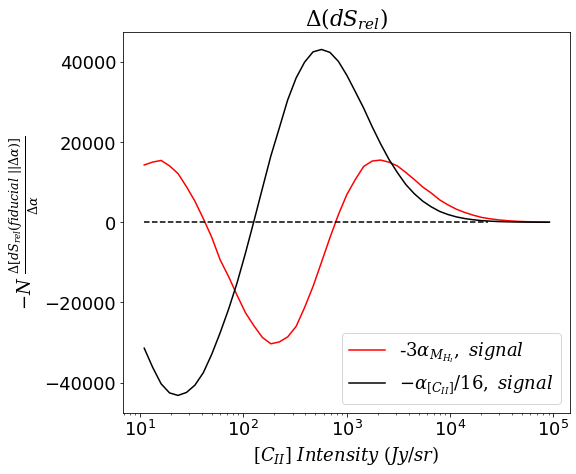

In [176]:
plt.plot(center, 3*avg_mhi74*(np.log(avg_mhi80/avg_mhi74) - np.log(avg_mhi68/avg_mhi74))/0.12, 'r', label = r'-$3\alpha_{M_{H_I}},\ signal$')
plt.plot(center, avg_a24*(np.log(avg_a28/avg_a24) - np.log(avg_a20/avg_a24))/(0.008*16), 'k', label = r'$-\alpha_{[C_{II}]}/16,\ signal$')


plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$-N\ \frac{\Delta [dS_{rel}(fiducial\ \vert \vert \Delta \alpha)]}{\Delta \alpha}$')
plt.title(r'$\Delta(dS_{rel})$')
plt.xscale('log')
#plt.yscale('log')
plt.hlines(y = 0, xmin = beam_center[0], xmax = beam_center[-1], linestyle = '--', color = 'k')
plt.legend()

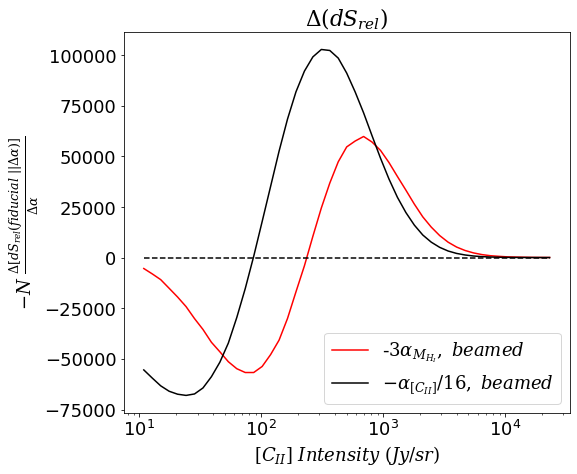

In [187]:
plt.plot(beam_center, 3*avg_mhi74_beam*(np.log(avg_mhi80_beam/avg_mhi74_beam) - np.log(avg_mhi68_beam/avg_mhi74_beam))/0.12, 'r', label = r'-$3\alpha_{M_{H_I}},\ beamed$')
plt.plot(beam_center, avg_a24_beam*(np.log(avg_a28_beam/avg_a24_beam) - np.log(avg_a20_beam/avg_a24_beam))/(0.008*16), 'k', label = r'$-\alpha_{[C_{II}]}/16,\ beamed$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$-N\ \frac{\Delta [dS_{rel}(fiducial\ \vert \vert \Delta \alpha)]}{\Delta \alpha}$')
plt.title(r'$\Delta(dS_{rel})$')
plt.xscale('log')
#plt.yscale('log')
plt.hlines(y = 0, xmin = beam_center[0], xmax = beam_center[-1], linestyle = '--', color = 'k')
plt.legend()

/tmp/ipykernel_1485185/2486990066.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, 3*avg_mhi74_for*(np.log(avg_mhi80_for/avg_mhi74_for) - np.log(avg_mhi68_for/avg_mhi74_for))/0.12, 'r', label = r'-$3\alpha_{M_{H_I}},\ forecast$')
/tmp/ipykernel_1485185/2486990066.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(lin_center, 3*avg_mhi74_for*(np.log(avg_mhi80_for/avg_mhi74_for) - np.log(avg_mhi68_for/avg_mhi74_for))/0.12, 'r', label = r'-$3\alpha_{M_{H_I}},\ forecast$')
/tmp/ipykernel_1485185/2486990066.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, avg_a24_for*(np.log(avg_a28_for/avg_a24_for) - np.log(avg_a20_for/avg_a24_for))/(0.008*16), 'k', label = r'$-\alpha_{[C_{II}]}/16,\ forecast$')
/tmp/ipykernel_1485185/2486990066.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(lin_center, avg_a24_for*(np.log(avg_a28_for/avg_a24_for) - np.log(avg_a20_for/avg_a24_for))/(0.008*16), 'k', label = r

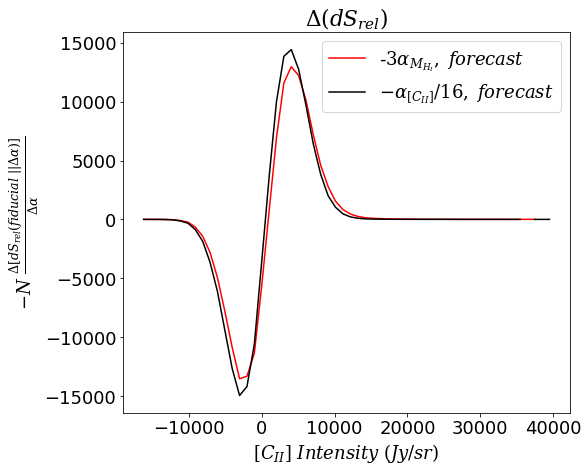

In [183]:
plt.plot(lin_center, 3*avg_mhi74_for*(np.log(avg_mhi80_for/avg_mhi74_for) - np.log(avg_mhi68_for/avg_mhi74_for))/0.12, 'r', label = r'-$3\alpha_{M_{H_I}},\ forecast$')
plt.plot(lin_center, avg_a24_for*(np.log(avg_a28_for/avg_a24_for) - np.log(avg_a20_for/avg_a24_for))/(0.008*16), 'k', label = r'$-\alpha_{[C_{II}]}/16,\ forecast$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$-N\ \frac{\Delta [dS_{rel}(fiducial\ \vert \vert \Delta \alpha)]}{\Delta \alpha}$')
plt.title(r'$\Delta(dS_{rel})$')
#plt.xscale('log')
#plt.yscale('log')
#plt.hlines(y = 0, xmin = center[0], xmax = center[-1], linestyle = '--', color = 'k')
plt.legend()

/tmp/ipykernel_1485185/1868260259.py:9: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, 3*avg_mhi74_for*(np.log(avg_mhi80_for/avg_mhi74_for) - np.log(avg_mhi68_for/avg_mhi74_for))/0.12, 'b', label = r'-$3\alpha_{M_{H_I}},\ forecast$')
/tmp/ipykernel_1485185/1868260259.py:9: RuntimeWarning: divide by zero encountered in log
  plt.plot(lin_center, 3*avg_mhi74_for*(np.log(avg_mhi80_for/avg_mhi74_for) - np.log(avg_mhi68_for/avg_mhi74_for))/0.12, 'b', label = r'-$3\alpha_{M_{H_I}},\ forecast$')
/tmp/ipykernel_1485185/1868260259.py:10: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, avg_a24_for*(np.log(avg_a28_for/avg_a24_for) - np.log(avg_a20_for/avg_a24_for))/(0.008*16), '--b', label = r'$-\alpha_{[C_{II}]}/16,\ forecast$')
/tmp/ipykernel_1485185/1868260259.py:10: RuntimeWarning: divide by zero encountered in log
  plt.plot(lin_center, avg_a24_for*(np.log(avg_a28_for/avg_a24_for) - np.log(avg_a20_for/avg_a24_for))/(0.008*16), '--b', lab

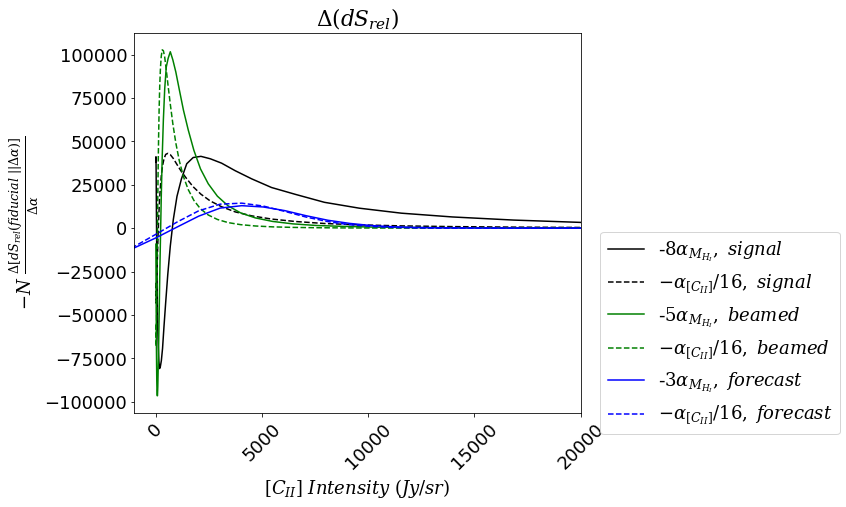

In [242]:
plt.plot(center, 8*avg_mhi74*(np.log(avg_mhi80/avg_mhi74) - np.log(avg_mhi68/avg_mhi74))/0.12, 'k', label = r'-$8\alpha_{M_{H_I}},\ signal$')
plt.plot(center, avg_a24*(np.log(avg_a28/avg_a24) - np.log(avg_a20/avg_a24))/(0.008*16), '--k', label = r'$-\alpha_{[C_{II}]}/16,\ signal$')


plt.plot(beam_center, 5.1*avg_mhi74_beam*(np.log(avg_mhi80_beam/avg_mhi74_beam) - np.log(avg_mhi68_beam/avg_mhi74_beam))/0.12, 'g', label = r'-$5\alpha_{M_{H_I}},\ beamed$')
plt.plot(beam_center, avg_a24_beam*(np.log(avg_a28_beam/avg_a24_beam) - np.log(avg_a20_beam/avg_a24_beam))/(0.008*16), '--g', label = r'$-\alpha_{[C_{II}]}/16,\ beamed$')


plt.plot(lin_center, 3*avg_mhi74_for*(np.log(avg_mhi80_for/avg_mhi74_for) - np.log(avg_mhi68_for/avg_mhi74_for))/0.12, 'b', label = r'-$3\alpha_{M_{H_I}},\ forecast$')
plt.plot(lin_center, avg_a24_for*(np.log(avg_a28_for/avg_a24_for) - np.log(avg_a20_for/avg_a24_for))/(0.008*16), '--b', label = r'$-\alpha_{[C_{II}]}/16,\ forecast$')




plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$-N\ \frac{\Delta [dS_{rel}(fiducial\ \vert \vert \Delta \alpha)]}{\Delta \alpha}$')
plt.title(r'$\Delta(dS_{rel})$')
#plt.xscale('log')
#plt.yscale('log')
#plt.hlines(y = 0, xmin = center[0], xmax = center[-1], linestyle = '--', color = 'k')

plt.xlim([-1000, 20000])
plt.xticks(rotation = 45)
plt.legend(loc = 'best', bbox_to_anchor = (1.6, 0.5))

# Pixelization Tailoring:

In [248]:
def own_beam(m, sig, pix): # added by Clara
    '''
    m is the limlam object
    sig is the 3D cube of intensities
    pix is the pixelization blurring desired. default is 1.
    '''
    sm_map = gaussian_filter(sig, [pix, pix, 0])
    noise_sigma  = m.sigma_N
    noise_map    = np.random.normal(0, noise_sigma.to(u.Jy/u.sr, equivalencies=u.brightness_temperature(m.nuObs)).value, sig.shape)
    # print(noise_sigma.to(u.Jy/u.sr).value)
    sm_noise_map = sm_map + noise_map
    
    return sm_noise_map

tobs = 1e6 h:

In [262]:
lin_binning_1e6 = np.linspace(-4*10**(3), 10**(4), 80)
lin_center_1e6 = (lin_binning_1e6[:-1] + lin_binning_1e6[1:]) / 2

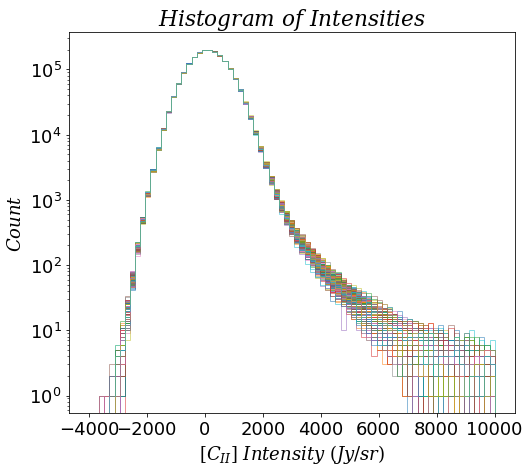

In [263]:
n_zdex04_tot_for1e6 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for1e6_nuObs270 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/for/for_tobs1e6h/cii_for'+str(i)+'.npy')
    n_zdex04_tot_for1e6[i], _, _ = plt.hist(for1e6_nuObs270.flatten(), bins = lin_binning_1e6, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

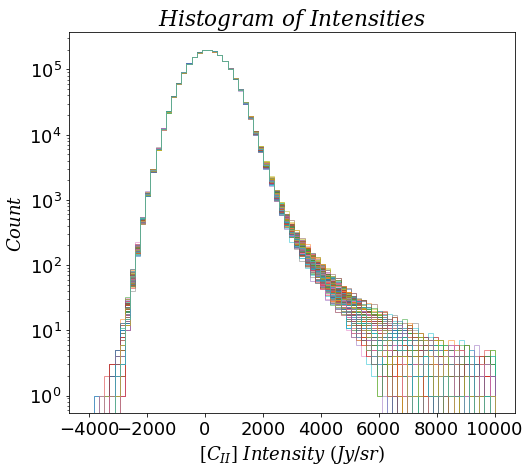

In [264]:
n_zdex03_tot_for1e6 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for1e6_zdex03 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex03/for/for_tobs1e6h/cii_for'+str(i)+'.npy')
    n_zdex03_tot_for1e6[i], _, _ = plt.hist(for1e6_zdex03.flatten(), bins = lin_binning_1e6, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

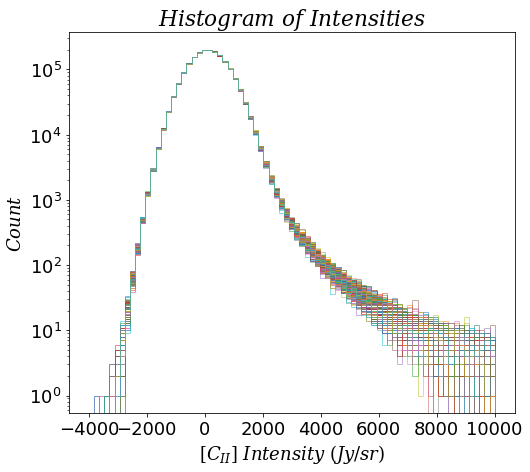

In [265]:
n_zdex05_tot_for1e6 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for1e6_zdex05 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex05/for/for_tobs1e6h/cii_for'+str(i)+'.npy')
    n_zdex05_tot_for1e6[i], _, _ = plt.hist(for1e6_zdex05.flatten(), bins = lin_binning_1e6, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [267]:
avg_zdex03_for1e6 = np.nanmean(n_zdex03_tot_for1e6, axis = 0)
avg_zdex04_for1e6 = np.nanmean(n_zdex04_tot_for1e6, axis = 0)
avg_zdex05_for1e6 = np.nanmean(n_zdex05_tot_for1e6, axis = 0)

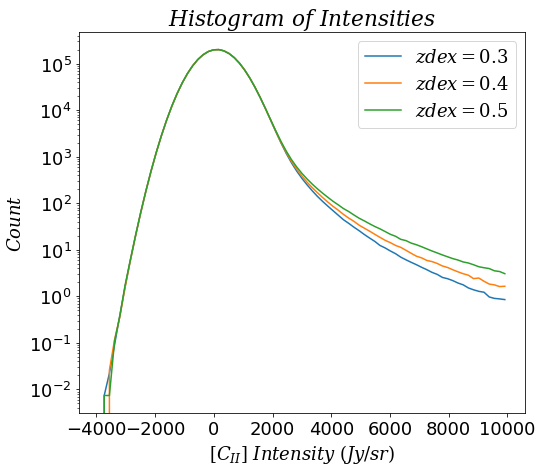

In [268]:
plt.plot(lin_center_1e6, avg_zdex03_for1e6, label = r'$zdex = 0.3$')
plt.plot(lin_center_1e6, avg_zdex04_for1e6, label = r'$zdex = 0.4$')
plt.plot(lin_center_1e6, avg_zdex05_for1e6, label = r'$zdex = 0.5$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
#plt.xscale('log')

plt.legend()

#plt.savefig('paper_figs/dsrel/alpha_cii_hist.png', bbox_inches = 'tight')

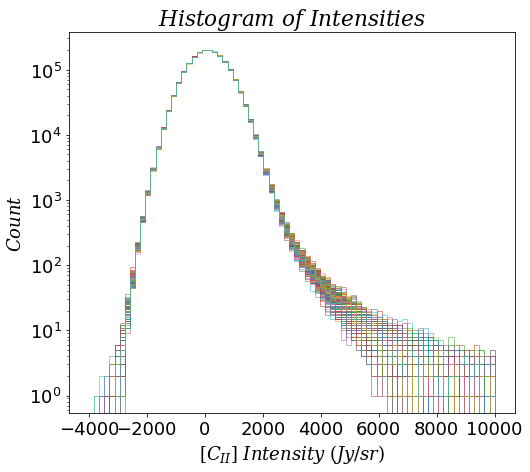

In [269]:
n_a20_tot_for1e6 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for1e6_a20 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-020/for/for_tobs1e6h/cii_for'+str(i)+'.npy')
    n_a20_tot_for1e6[i], _, _ = plt.hist(for1e6_a20.flatten(), bins = lin_binning_1e6, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

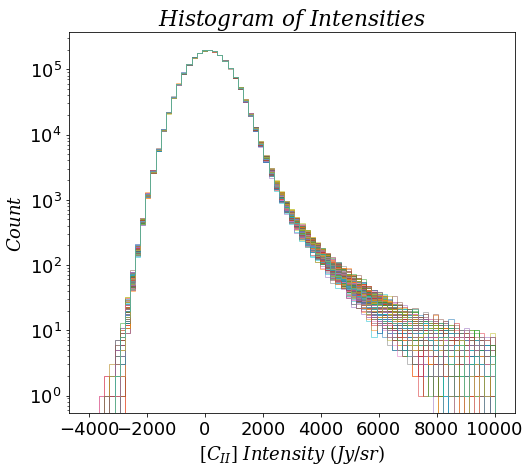

In [270]:
n_a28_tot_for1e6 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for1e6_a28 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-028/for/for_tobs1e6h/cii_for'+str(i)+'.npy')
    n_a28_tot_for1e6[i], _, _ = plt.hist(for1e6_a28.flatten(), bins = lin_binning_1e6, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [271]:
avg_a20_for1e6 = np.nanmean(n_a20_tot_for1e6, axis = 0)
avg_a24_for1e6 = avg_zdex04_for1e6
avg_a28_for1e6 = np.nanmean(n_a28_tot_for1e6, axis = 0)

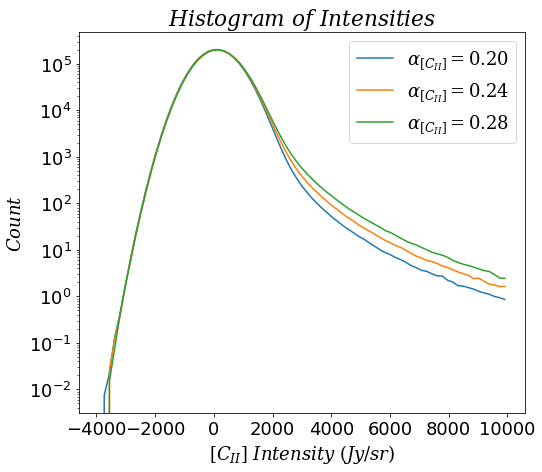

In [272]:
plt.plot(lin_center_1e6, avg_a20_for1e6, label = r'$\alpha_{[C_{II}]} = 0.20$')
plt.plot(lin_center_1e6, avg_a24_for1e6, label = r'$\alpha_{[C_{II}]} = 0.24$')
plt.plot(lin_center_1e6, avg_a28_for1e6, label = r'$\alpha_{[C_{II}]} = 0.28$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
#plt.xscale('log')

plt.legend()

#plt.savefig('paper_figs/dsrel/alpha_cii_hist.png', bbox_inches = 'tight')

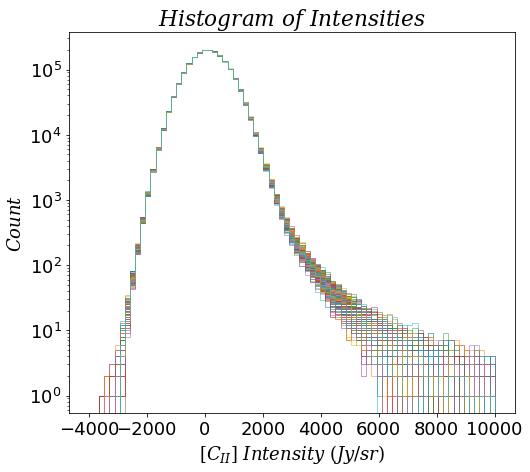

In [273]:
n_mhi68_tot_for1e6 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for1e6_mhi68 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-68/for/for_tobs1e6h/cii_for'+str(i)+'.npy')
    n_mhi68_tot_for1e6[i], _, _ = plt.hist(for1e6_mhi68.flatten(), bins = lin_binning_1e6, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

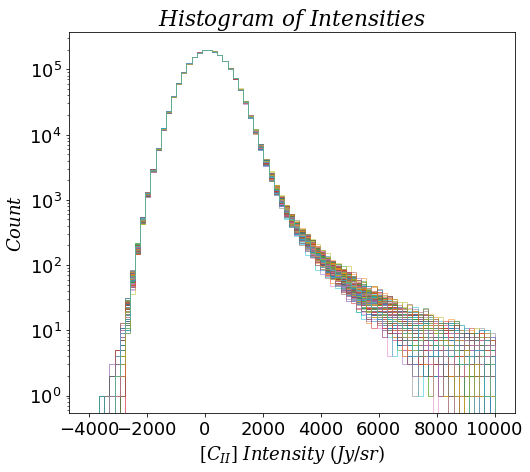

In [274]:
n_mhi80_tot_for1e6 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for1e6_mhi80 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-80/for/for_tobs1e6h/cii_for'+str(i)+'.npy')
    n_mhi80_tot_for1e6[i], _, _ = plt.hist(for1e6_mhi80.flatten(), bins = lin_binning_1e6, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [275]:
avg_mhi68_for1e6 = np.nanmean(n_mhi68_tot_for1e6, axis = 0)
avg_mhi74_for1e6 = avg_zdex04_for1e6
avg_mhi80_for1e6 = np.nanmean(n_mhi80_tot_for1e6, axis = 0)

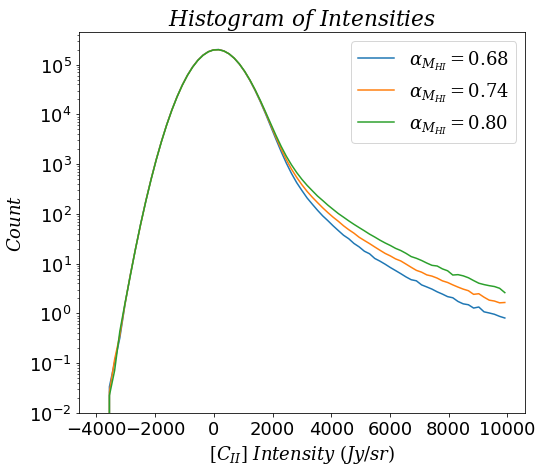

In [276]:
plt.plot(lin_center_1e6, avg_mhi68_for1e6, label = r'$\alpha_{M_{HI}} = 0.68$')
plt.plot(lin_center_1e6, avg_mhi74_for1e6, label = r'$\alpha_{M_{HI}} = 0.74$')
plt.plot(lin_center_1e6, avg_mhi80_for1e6, label = r'$\alpha_{M_{HI}} = 0.80$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
#plt.xscale('log')

plt.legend()

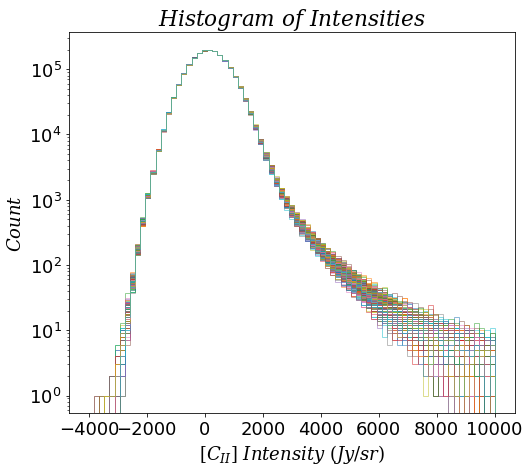

In [277]:
n_min99_tot_for1e6 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for1e6_min99 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e9-9/for/for_tobs1e6h/cii_for'+str(i)+'.npy')
    n_min99_tot_for1e6[i], _, _ = plt.hist(for1e6_min99.flatten(), bins = lin_binning_1e6, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

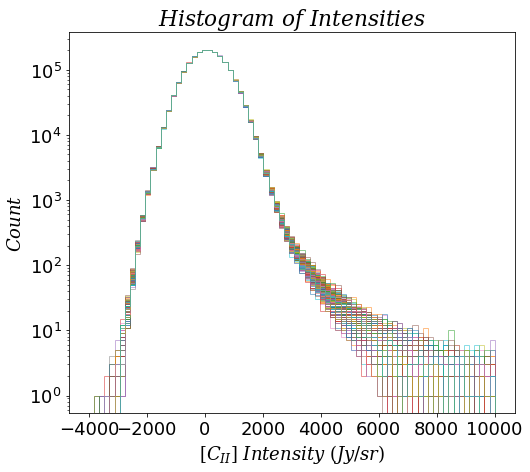

In [278]:
n_min01_tot_for1e6 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for1e6_min01 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10-1/for/for_tobs1e6h/cii_for'+str(i)+'.npy')
    n_min01_tot_for1e6[i], _, _ = plt.hist(for1e6_min01.flatten(), bins = lin_binning_1e6, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [279]:
avg_min99_for1e6 = np.nanmean(n_min99_tot_for1e6, axis = 0)
avg_min10_for1e6 = avg_zdex04_for1e6
avg_min01_for1e6 = np.nanmean(n_min01_tot_for1e6, axis = 0)

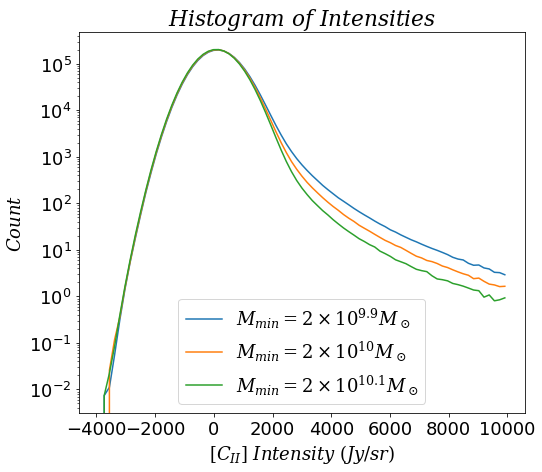

In [280]:
plt.plot(lin_center_1e6, avg_min99_for1e6, label = r'$M_{min} = 2 \times 10^{9.9} M_\odot$')
plt.plot(lin_center_1e6, avg_min10_for1e6, label = r'$M_{min} = 2 \times 10^{10} M_\odot$')
plt.plot(lin_center_1e6, avg_min01_for1e6, label = r'$M_{min} = 2 \times 10^{10.1} M_\odot$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
#plt.xscale('log')

plt.legend()

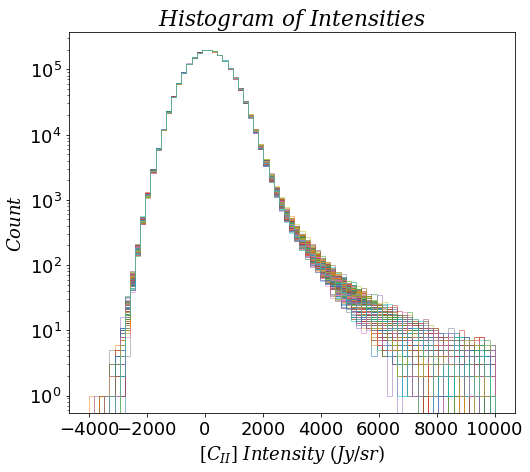

In [281]:
n_a03_tot_for1e6 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for1e6_a03 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_312/for/for_tobs1e6h/cii_for'+str(i)+'.npy')
    n_a03_tot_for1e6[i], _, _ = plt.hist(for1e6_a03.flatten(), bins = lin_binning_1e6, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

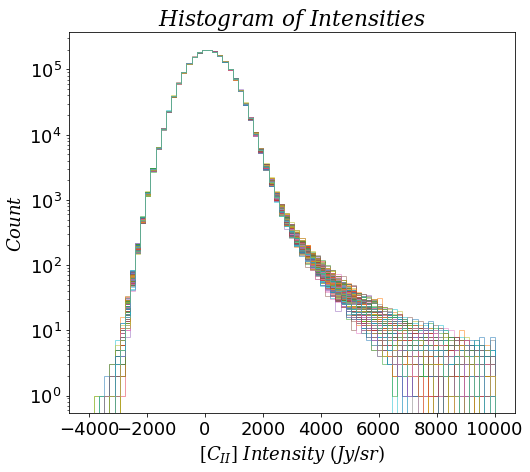

In [282]:
n_a05_tot_for1e6 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for1e6_a05 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_512/for/for_tobs1e6h/cii_for'+str(i)+'.npy')
    n_a05_tot_for1e6[i], _, _ = plt.hist(for1e6_a05.flatten(), bins = lin_binning_1e6, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [283]:
avg_a013_for1e6 = np.nanmean(n_a03_tot_for1e6, axis = 0)
avg_a014_for1e6 = avg_zdex04_for1e6
avg_a015_for1e6 = np.nanmean(n_a05_tot_for1e6, axis = 0)

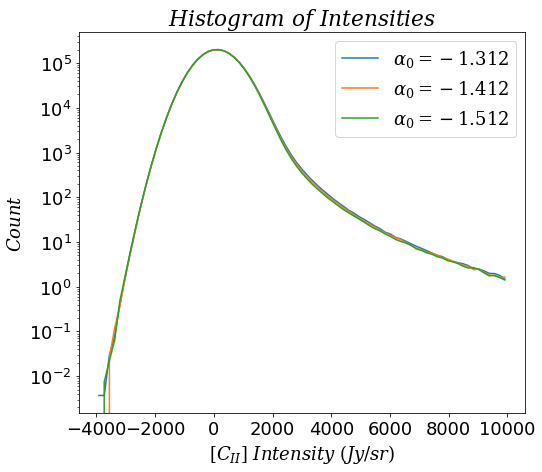

In [284]:
plt.plot(lin_center_1e6, avg_a013_for1e6, label = r'$\alpha_{0} = -1.312$')
plt.plot(lin_center_1e6, avg_a014_for1e6, label = r'$\alpha_{0} = -1.412$')
plt.plot(lin_center_1e6, avg_a015_for1e6, label = r'$\alpha_{0} = -1.512$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
#plt.xscale('log')

plt.legend()

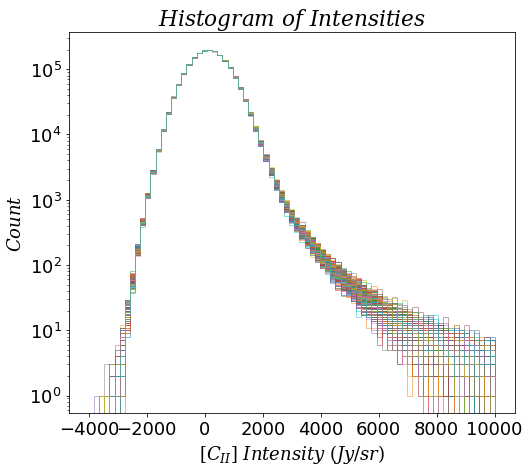

In [286]:
n_g27_tot_for1e6 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for1e6_g27 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_27/for/for_tobs1e6h/cii_for'+str(i)+'.npy')
    n_g27_tot_for1e6[i], _, _ = plt.hist(for1e6_g27.flatten(), bins = lin_binning_1e6, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

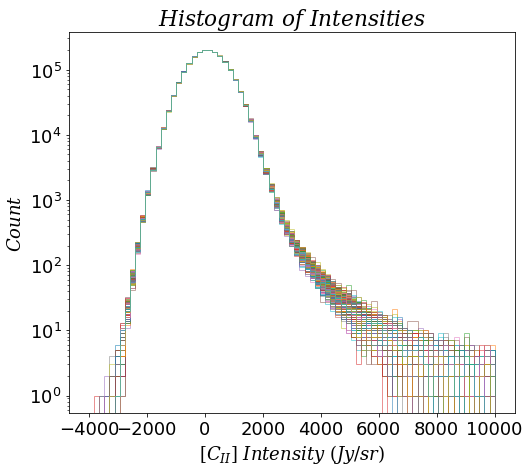

In [285]:
n_g35_tot_for1e6 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    for1e6_g35 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_35/for/for_tobs1e6h/cii_for'+str(i)+'.npy')
    n_g35_tot_for1e6[i], _, _ = plt.hist(for1e6_g35.flatten(), bins = lin_binning_1e6, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [287]:
avg_g27_for1e6 = np.nanmean(n_g27_tot_for1e6, axis = 0)
avg_g31_for1e6 = avg_zdex04_for1e6
avg_g35_for1e6 = np.nanmean(n_g35_tot_for1e6, axis = 0)

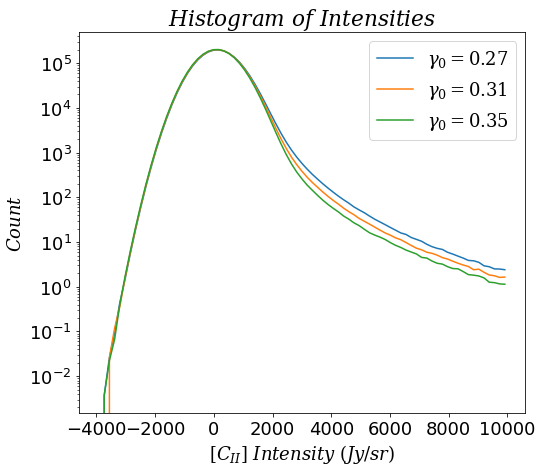

In [288]:
plt.plot(lin_center_1e6, avg_g27_for1e6, label = r'$\gamma_{0} = 0.27$')
plt.plot(lin_center_1e6, avg_g31_for1e6, label = r'$\gamma_{0} = 0.31$')
plt.plot(lin_center_1e6, avg_g35_for1e6, label = r'$\gamma_{0} = 0.35$')

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$Count$')
plt.title(r'$Histogram\ of\ Intensities$')

plt.yscale('log')
#plt.xscale('log')

plt.legend()

/tmp/ipykernel_1485185/3146887068.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(lin_center_1e6, -avg_zdex04_for1e6*(np.log(avg_zdex05_for1e6/avg_zdex04_for1e6) - np.log(avg_zdex03_for1e6/avg_zdex04_for1e6))/0.2, label = r'$zdex$')
/tmp/ipykernel_1485185/3146887068.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center_1e6, -avg_zdex04_for1e6*(np.log(avg_zdex05_for1e6/avg_zdex04_for1e6) - np.log(avg_zdex03_for1e6/avg_zdex04_for1e6))/0.2, label = r'$zdex$')
/tmp/ipykernel_1485185/3146887068.py:1: RuntimeWarning: invalid value encountered in subtract
  plt.plot(lin_center_1e6, -avg_zdex04_for1e6*(np.log(avg_zdex05_for1e6/avg_zdex04_for1e6) - np.log(avg_zdex03_for1e6/avg_zdex04_for1e6))/0.2, label = r'$zdex$')
/tmp/ipykernel_1485185/3146887068.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center_1e6, (1/16)*avg_a24_for1e6*(np.log(avg_a28_for1e6/avg_a24_for1e6) - np.log(avg_a20_for1e6/avg_a24_for1e6))/(0.008), label

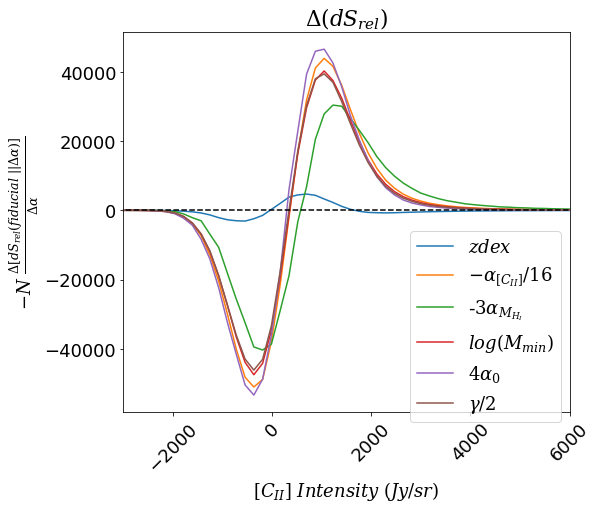

In [290]:
plt.plot(lin_center_1e6, -avg_zdex04_for1e6*(np.log(avg_zdex05_for1e6/avg_zdex04_for1e6) - np.log(avg_zdex03_for1e6/avg_zdex04_for1e6))/0.2, label = r'$zdex$')
plt.plot(lin_center_1e6, (1/16)*avg_a24_for1e6*(np.log(avg_a28_for1e6/avg_a24_for1e6) - np.log(avg_a20_for1e6/avg_a24_for1e6))/(0.008), label = r'$-\alpha_{[C_{II}]}/16$')
plt.plot(lin_center_1e6, 3*avg_mhi74_for1e6*(np.log(avg_mhi80_for1e6/avg_mhi74_for1e6) - np.log(avg_mhi68_for1e6/avg_mhi74_for1e6))/0.12, label = r'-$3\alpha_{M_{H_I}}$')
plt.plot(lin_center_1e6, -avg_min10_for1e6*(np.log(avg_min01_for1e6/avg_min10_for1e6) - np.log(avg_min99_for1e6/avg_min10_for1e6))/((10.1) - 9.9), label = r'$log(M_{min})$')
plt.plot(lin_center_1e6, -4*avg_a014_for1e6*(np.log(avg_a015_for1e6/avg_a014_for1e6) - np.log(avg_a013_for1e6/avg_a014_for1e6))/0.2, label = r'$4\alpha_0$')
plt.plot(lin_center_1e6, -0.5*avg_g31_for1e6*(np.log(avg_g35_for1e6/avg_g31_for1e6) - np.log(avg_g27_for1e6/avg_g31_for1e6))/0.08, label = r'$\gamma/2$')


plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$-N\ \frac{\Delta [dS_{rel}(fiducial\ \vert \vert \Delta \alpha)]}{\Delta \alpha}$')
plt.title(r'$\Delta(dS_{rel})$')
plt.xlim([-3000, 6000])
plt.xticks(rotation = 45)
plt.hlines(y = 0, xmin = lin_center_1e6[0], xmax = lin_center_1e6[-1], linestyle = '--', color = 'k')
plt.legend(bbox_to_anchor = (1, 0.5))

#plt.savefig('paper_figs/dsrel/drel_sig_v2.png', bbox_inches = 'tight')

In [291]:
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/for_tobs1e6h/n_avg_basis.npy', avg_zdex04_for1e6)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/for_tobs1e6h/n_avg_zdex0-3.npy', avg_zdex03_for1e6)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/for_tobs1e6h/n_avg_zdex0-5.npy', avg_zdex05_for1e6)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/for_tobs1e6h/n_avg_acii0-020.npy', avg_a20_for1e6)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/for_tobs1e6h/n_avg_acii0-028.npy', avg_a28_for1e6)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/for_tobs1e6h/n_avg_mhi0-68.npy', avg_mhi68_for1e6)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/for_tobs1e6h/n_avg_mhi0-80.npy', avg_mhi80_for1e6)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/for_tobs1e6h/n_avg_logmmin9-9.npy', avg_min99_for1e6)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/for_tobs1e6h/n_avg_logmmin10-1.npy', avg_min01_for1e6)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/for_tobs1e6h/n_avg_a0_-1-312.npy', avg_a013_for1e6)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/for_tobs1e6h/n_avg_a0_-1-512.npy', avg_a015_for1e6)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/for_tobs1e6h/n_avg_g0_0-27.npy', avg_g27_for1e6)
np.save('/mnt/scratch-lustre/horlaville/nuObs270/dsrel/for/for_tobs1e6h/n_avg_g0_0-35.npy', avg_g35_for1e6)

/tmp/ipykernel_1485185/3201436461.py:8: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center_1e6, 3*avg_mhi74_for1e6*(np.log(avg_mhi80_for1e6/avg_mhi74_for1e6) - np.log(avg_mhi68_for1e6/avg_mhi74_for1e6))/0.12, 'g', label = r'-$3\alpha_{M_{H_I}},\ 1e6forecast$')
/tmp/ipykernel_1485185/3201436461.py:9: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center_1e6, avg_a24_for1e6*(np.log(avg_a28_for1e6/avg_a24_for1e6) - np.log(avg_a20_for1e6/avg_a24_for1e6))/(0.008*16), '--g', label = r'$-\alpha_{[C_{II}]}/16,\ 1e6forecast$')
/tmp/ipykernel_1485185/3201436461.py:9: RuntimeWarning: divide by zero encountered in divide
  plt.plot(lin_center_1e6, avg_a24_for1e6*(np.log(avg_a28_for1e6/avg_a24_for1e6) - np.log(avg_a20_for1e6/avg_a24_for1e6))/(0.008*16), '--g', label = r'$-\alpha_{[C_{II}]}/16,\ 1e6forecast$')
/tmp/ipykernel_1485185/3201436461.py:12: RuntimeWarning: invalid value encountered in divide
  plt.plot(lin_center, 3*avg_mhi74_for*(np.log(avg_mhi80

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
        1.e+06]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

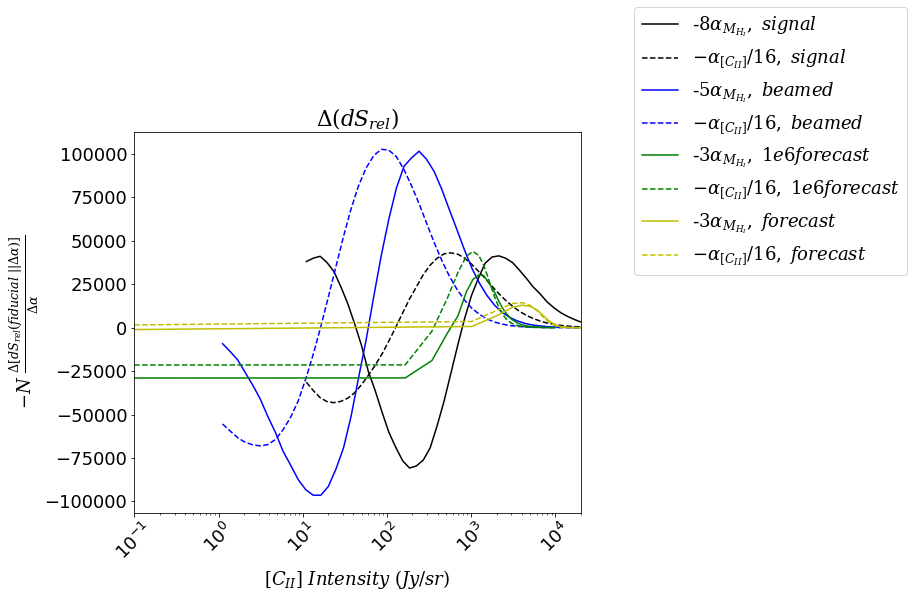

In [308]:
plt.plot(center, 8*avg_mhi74*(np.log(avg_mhi80/avg_mhi74) - np.log(avg_mhi68/avg_mhi74))/0.12, 'k', label = r'-$8\alpha_{M_{H_I}},\ signal$')
plt.plot(center, avg_a24*(np.log(avg_a28/avg_a24) - np.log(avg_a20/avg_a24))/(0.008*16), '--k', label = r'$-\alpha_{[C_{II}]}/16,\ signal$')


plt.plot(beam_center, 5.1*avg_mhi74_beam*(np.log(avg_mhi80_beam/avg_mhi74_beam) - np.log(avg_mhi68_beam/avg_mhi74_beam))/0.12, 'b', label = r'-$5\alpha_{M_{H_I}},\ beamed$')
plt.plot(beam_center, avg_a24_beam*(np.log(avg_a28_beam/avg_a24_beam) - np.log(avg_a20_beam/avg_a24_beam))/(0.008*16), '--b', label = r'$-\alpha_{[C_{II}]}/16,\ beamed$')

plt.plot(lin_center_1e6, 3*avg_mhi74_for1e6*(np.log(avg_mhi80_for1e6/avg_mhi74_for1e6) - np.log(avg_mhi68_for1e6/avg_mhi74_for1e6))/0.12, 'g', label = r'-$3\alpha_{M_{H_I}},\ 1e6forecast$')
plt.plot(lin_center_1e6, avg_a24_for1e6*(np.log(avg_a28_for1e6/avg_a24_for1e6) - np.log(avg_a20_for1e6/avg_a24_for1e6))/(0.008*16), '--g', label = r'$-\alpha_{[C_{II}]}/16,\ 1e6forecast$')


plt.plot(lin_center, 3*avg_mhi74_for*(np.log(avg_mhi80_for/avg_mhi74_for) - np.log(avg_mhi68_for/avg_mhi74_for))/0.12, 'y', label = r'-$3\alpha_{M_{H_I}},\ forecast$')
plt.plot(lin_center, avg_a24_for*(np.log(avg_a28_for/avg_a24_for) - np.log(avg_a20_for/avg_a24_for))/(0.008*16), '--y', label = r'$-\alpha_{[C_{II}]}/16,\ forecast$')



plt.legend(bbox_to_anchor = (1.1,0.6))
plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$-N\ \frac{\Delta [dS_{rel}(fiducial\ \vert \vert \Delta \alpha)]}{\Delta \alpha}$')
plt.title(r'$\Delta(dS_{rel})$')
plt.xscale('log')
#plt.yscale('log')
#plt.hlines(y = 0, xmin = center[0], xmax = center[-1], linestyle = '--', color = 'k')

plt.xlim([10**(-1), 20000])
plt.xticks(rotation = 45)
#plt.legend(loc = 'best', bbox_to_anchor = (1, 1))
#plt.legend()